In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d spsayakpaul/arxiv-paper-abstracts
!mkdir -p data/arxiv
!unzip arxiv-paper-abstracts.zip -d data/arxiv
!rm arxiv-paper-abstracts.zip

 99% 44.0M/44.6M [00:00<00:00, 88.4MB/s]
100% 44.6M/44.6M [00:00<00:00, 87.3MB/s]
Archive:  arxiv-paper-abstracts.zip
  inflating: data/arxiv/arxiv_data.csv  
  inflating: data/arxiv/arxiv_data_210930-054931.csv  


In [4]:
!pip install fasttext pandarallel transformers==4.28.0 accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fasttext-0.9.2.tar.gz (68 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.4 MB/s eta 0:00:00
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.6 MB/s eta 0:00:00
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393301 sha256=1298e46579bd29ba68602a9c73987c83c8d66b91a4bc77c90b4820195f570b3b
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
  Created wheel for pandarallel: filenam

<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر سلیمانی
</font>
<p></p>
<br>
<font>
<b>فاز دوم پروژه</b>
</font>
<br>
<br>
موعد تحویل: ۵ خرداد ۱۴۰۲ <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4 >
سامانه‌های مبتنی بر یادگیری ماشین در بخش‌های مختلف از روش‌های یادگیری ماشین استفاده می‌کنند. دسته‌بندی و
خوشه‌بندی
دو کار مورد نیاز این سامانه‌ها هستند. در این تمرین به پیاده‌سازی این کارها با روش‌های مختلف و پیاده‌سازی قابلیت‌های جدید برای سیستم بازیابی روی مقالات علمی می‌پردازیم. دادگان این فاز را می‌توانید از
<a href="https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download">این لینک</a>
دانلود کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>دسته‌بندی توسط NaiveBayes (۱۸ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به دسته‌بندی اسناد می‌پردازید. برای این منظور، ابتدا برای هر سند، بردار مربوط به تعداد کلمات کل را بسازید و سپس classifier NaiveBaise را خودتان از پایه پیاده‌سازی کرده و اسناد را دسته‌بندی کنید.
در این تسک می‌توانید از کل دیتاست استفاده نکنید ولی باید دیتاست شما شامل هر سه کلاس موجود در دیتاست اصلی باشد.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دانلود دیتاست و آشنایی با آن</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت دیتاست زیر را در kaggle دریافت کرده و ویژگی‌های آن را مشاهده کنید.
</font>
</div>

In [ ]:
import torch
import nltk
import numpy as np
import pandas as pd
from pandarallel import pandarallel
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
pandarallel.initialize()
nltk.download('punkt')
nltk.download('stopwords')

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
[nltk_data] Downloading package punkt to /Users/ahmad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ahmad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('./data/arxiv/arxiv_data_210930-054931.csv')
df['category'] = df['terms'].apply(lambda l: eval(l)[0])
df = df.drop_duplicates(['titles']).drop_duplicates(['abstracts']).reset_index(drop=True)

In [ ]:
df

,terms,titles,abstracts,category
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG
...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG


In [ ]:
df.groupby('category')['abstracts'].describe()

,count,unique,top,freq
category,,,,
cs.CV,21619,21619,Predicting depth from a single image is an att...,1
cs.LG,16603,16603,"Recently, generating adversarial examples has ...",1
stat.ML,2878,2878,State space models (SSMs) provide a flexible f...,1


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش سایز دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید سایز دیتاست را به دلخواه کم کرده تا NaiveBayes عملکرد بهتری بتواند از خودش نشان دهد.
    کاهش سایز دیتاست می‌تواند باعث افزایش سرعت و حافظه‌ی مورد نیاز شود.
</font>
</div>

In [ ]:
#TODO

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>پیش‌پردازش دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید با استفاده از تابع زیر یا توابعی که در فاز 1 تعریف کردید به پیش‌پردازش دیتاست بپردازید.
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>

In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [ ]:
df['preprocessed'] = df['titles'].str.cat(df['abstracts'], ' ').parallel_apply(preprocess_text)
df

,terms,titles,abstracts,category,preprocessed
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG,"[multi-level, attention, pooling, graph, neura..."
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG,"[decision, forests, vs, deep, networks, concep..."
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG,"[power, robust, graph, convolutional, network,..."
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG,"[releasing, graph, neural, networks, different..."
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG,"[recurrence-aware, long-term, cognitive, netwo..."
...,...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML,"[experimental, study, graph-based, semi-superv..."
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML,"[bayesian, differential, privacy, posterior, s..."
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV,"[mining, spatio-temporal, data, industrializat..."
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG,"[wav2letter, end-to-end, convnet-based, speech..."


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>آماده‌سازی دیتای train و test</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت با ساخت ماتریس doc-word می‌توانید دیتای مورد نیاز برای NaiveBayes را آماده کنید. در این ماتریس هر سطر نشان‌دهنده آیدی داکیومنت و هر ستون نشان‌دهنده یک کلمه در کل vocabulary شما می‌باشد.
   همچنین می‌توانید از CountVectorizer استفاده کنید. 
</font>
</div>

In [ ]:
vectorizer = CountVectorizer()
doc_word = vectorizer.fit_transform(df['preprocessed'].apply(' '.join).tolist())

In [ ]:
vectorizer.get_feature_names_out()[40000:40010]

array(['octconv', 'octet', 'octfcn', 'octid', 'octnet', 'octo', 'october',
       'octonion', 'octopus', 'octree'], dtype=object)

In [ ]:
doc_word.shape

(41100, 63211)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(doc_word.toarray(), df['category'], test_size=0.2, random_state=13)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دسته‌بندی با استفاده از NaivaBayes</b>
    </h2>
    در این بخش کلاس زیر را تکمیل نمایید تا classifier NaiveBayes را <u><b>از پایه</b></u> پیاده‌سازی کنید.
</font>
</div>

In [ ]:
class NaiveBayes:
    def __init__(self, alpha=1.0):
        self.prior = None
        self.word_counts = None
        self.lk_word = None
        self.classes = None
        self.alpha = alpha

    def fit(self, x, y):
        """
        Fit the features and the labels
        Calculate prior, word_counts and lk_word

        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc

        Returns
        -------
        self
            Returns self as a classifier
        """
        m, n = x.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.prior = np.zeros(n_classes)
        self.word_counts = np.zeros((n_classes, n))
        self.lk_word = np.zeros((n_classes, n))
        for i, c in enumerate(self.classes):
            x_c = x[c == y]
            self.prior[i] = x_c.shape[0] / m
            self.word_counts[i, :] = x_c.sum(axis=0)
            self.lk_word[i, :] = (self.word_counts[i, :] + self.alpha) / (self.word_counts[i, :].sum() + self.alpha * n)
        return self

    def predict(self, x: np.ndarray):
        """
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count
            of docs and n is vocabulary size

        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        """
        y_hat = np.log(self.prior) + x @ np.log(self.lk_word.T)
        return self.classes[np.argmax(y_hat, axis=1)]

In [ ]:
# use your classifier to fit on the training data
# then try to predict classes of test data

nb = NaiveBayes()
nb.fit(X_train, y_train)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>ارزیابی مدل train شده</b>
    </h2>
    در این بخش precision، recall، F1 score را در حالت macro و micro
    و accuracy مدل
    را با استفاده از sklearn به دست آورید.
</font>
</div>

In [ ]:
p_test = nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score(y_test, p_test)
print("Accuracy:", acc)

# Micro metrics
micro_recall = recall_score(y_test, p_test, average='micro')
micro_precision = precision_score(y_test, p_test, average='micro')
micro_f1 = f1_score(y_test, p_test, average='micro')

print("Micro Recall:", micro_recall)
print("Micro Precision:", micro_precision)
print("Micro F1:", micro_f1)

# Macro metrics
macro_recall = recall_score(y_test, p_test, average='macro')
macro_precision = precision_score(y_test, p_test, average='macro')
macro_f1 = f1_score(y_test, p_test, average='macro')

print("Macro Recall:", macro_recall)
print("Macro Precision:", macro_precision)
print("Macro F1:", macro_f1)

Accuracy: 0.8510948905109489
Micro Recall: 0.8510948905109489
Micro Precision: 0.8510948905109489
Micro F1: 0.8510948905109489
Macro Recall: 0.7293484654494146
Macro Precision: 0.7274633683094304
Macro F1: 0.7283367170511735


<div dir="rtl">
<font face="XB Zar" size=4>
در بخش پایین roc curve مربوط به این دسته‌بندی non-binary را به دست آورده و به صورت مختصر تحلیل کنید.
</div>
</font>

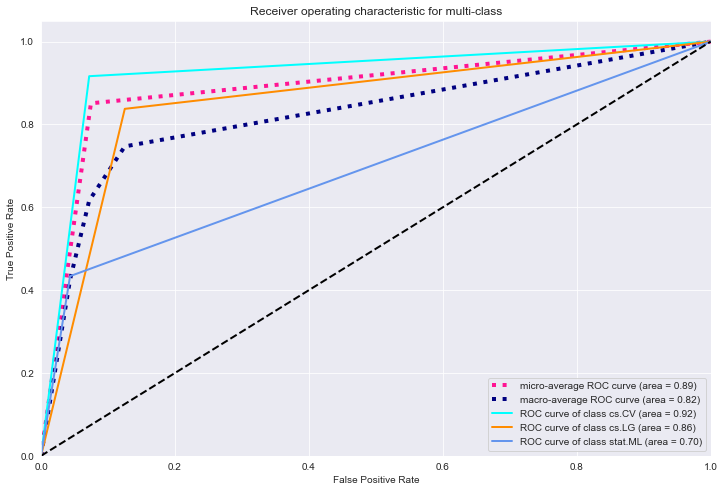

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assuming p_test is an array of predicted probabilities for each class
# with shape (num_samples, num_classes)
y_score = label_binarize(p_test, classes=nb.classes)

# Convert y_test to one-hot encoding
y_test_one_hot = label_binarize(y_test, classes=nb.classes)

# Compute ROC curve and ROC area for each class
n_classes = y_test_one_hot.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_one_hot[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_one_hot.ravel(), y_score.ravel())
roc_auc["micro"] = roc_auc_score(y_test_one_hot, y_score, average="micro")

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = roc_auc_score(y_test_one_hot, y_score, average="macro")

# Plot ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

from itertools import cycle
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(nb.classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')

plt.legend(loc="lower right")
plt.show()

<div dir="rtl">
<font face="XB Zar" size=4>
در این بخش confusion matrix را بدون استفاده از sklearn و به کمک matplotlib و seaborn بکشید.
</font>
</div>

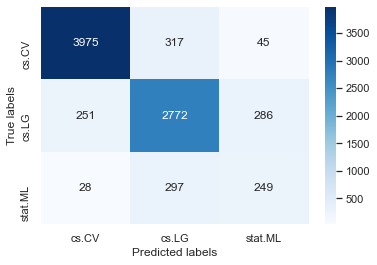

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def confusion_matrix(y_test, p_test, labels):
    n_labels = len(labels)
    c2i = {label: i for i, label in enumerate(labels)}
    cm = np.zeros((n_labels, n_labels), dtype=np.int32)
    for i, j in zip(y_test, p_test):
        cm[c2i[i], c2i[j]] += 1
    return cm


cm = confusion_matrix(y_test, p_test, nb.classes)
# Plot the confusion matrix as a heatmap
sns.set()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=nb.classes, yticklabels=nb.classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با شبکه های عصبی (۳۲ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    شما یک مجموعه داده از مقالات علمی دارید، هرکدام با یک چکیده و موضوع مربوطه نشان داده شده است. هدف ساختن یک مدل شبکه عصبی است که بتواند بر اساس چکیده مقاله علمی و عنوان آن، موضوع آن را پیش بینی کند.
</font>
</div>
   

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>داده ها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>
   

## Requirements

In [ ]:
# You may not use all of these imports, but they are here to help you get started
# you can add cells if you needed
import tempfile
from typing import List, Tuple

import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import fasttext
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from pandarallel import pandarallel

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from time import time
from IPython.display import display

In [ ]:
pandarallel.initialize()
nltk.download('punkt')
nltk.download('stopwords')

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
[nltk_data] Downloading package punkt to /Users/ahmad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ahmad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [ ]:
# read data
df = pd.read_csv('./data/arxiv/arxiv_data_210930-054931.csv')
df['category'] = df['terms'].apply(lambda l: eval(l)[0])
df = df.drop_duplicates(['titles']).drop_duplicates(['abstracts']).reset_index(drop=True)
df

,terms,titles,abstracts,category
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG
...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG


In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """

    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>

</font>
</div>

In [ ]:
# preprocess text
df['preprocessed'] = df['titles'].str.cat(df['abstracts'], ' ').parallel_apply(preprocess_text)
df

,terms,titles,abstracts,category,preprocessed
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG,"[multi-level, attention, pooling, graph, neura..."
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG,"[decision, forests, vs, deep, networks, concep..."
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG,"[power, robust, graph, convolutional, network,..."
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG,"[releasing, graph, neural, networks, different..."
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG,"[recurrence-aware, long-term, cognitive, netwo..."
...,...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML,"[experimental, study, graph-based, semi-superv..."
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML,"[bayesian, differential, privacy, posterior, s..."
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV,"[mining, spatio-temporal, data, industrializat..."
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG,"[wav2letter, end-to-end, convnet-based, speech..."


---------------------------------------- lengths statistics ----------------------------------------
count    41100.000000
mean       116.203114
std         29.988946
min         11.000000
25%         95.000000
50%        115.000000
75%        136.000000
max        303.000000
Name: preprocessed, dtype: float64


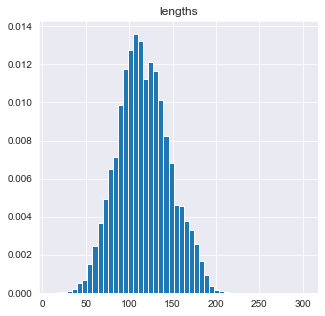

In [ ]:
# perform data cleaning and eda (you can add cells here)
# Text length

lens = df['preprocessed'].apply(len)

print(' lengths statistics '.center(100, '-'))
print(lens.describe())

plt.figure(figsize=(5, 5))
plt.hist(lens, bins=50, density=True)
plt.title('lengths')
plt.show()

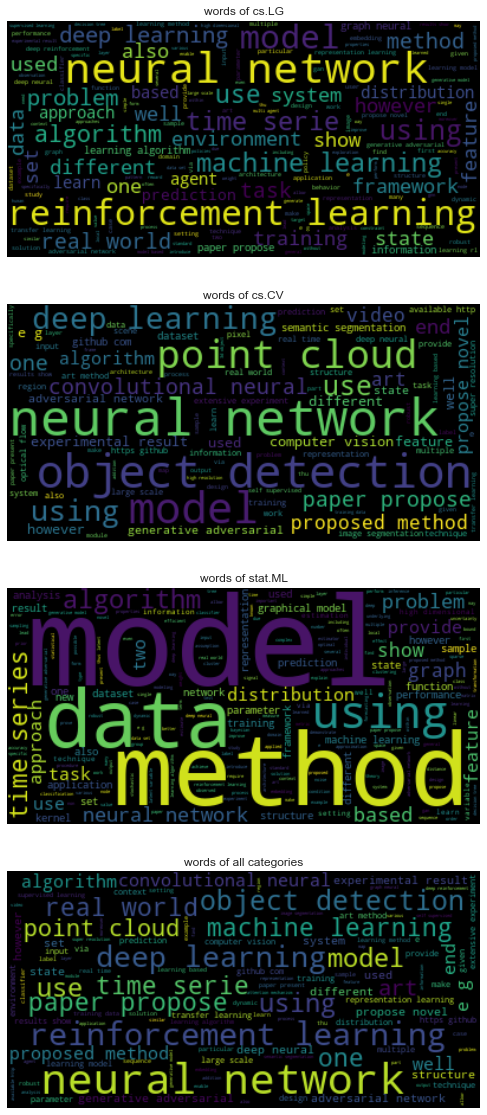

In [ ]:
# Word-clouds grouped by category

stops = nltk.corpus.stopwords.words('english')

categories = df.category.unique()

plt.figure(figsize=(10, 20))
for i, category in enumerate(categories):
    plt.subplot(len(categories) + 1, 1, i + 1)
    plt.imshow(WordCloud(stopwords=stops)\
               .generate(' '.join(df[df.category == category]['preprocessed'].str.join(' '))), interpolation='bilinear')
    plt.title(f'words of {category}')
    plt.axis('off')

plt.subplot(len(categories) + 1, 1, len(categories) + 1)
plt.imshow(WordCloud(stopwords=stops).generate(' '.join(df['preprocessed'].str.join(' '))), interpolation='bilinear')
plt.title('words of all categories')
plt.axis('off')

plt.show()

## Vectorize data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر مقاله برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
    </font>
</div>

In [ ]:
class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        with tempfile.NamedTemporaryFile('w') as tmp:
            print('\n'.join([' '.join(text) for text in texts]), file=tmp)
            tmp.seek(0)
            self.model = fasttext.train_unsupervised(input=tmp.name, model=self.method, dim=100)

    def get_query_embedding(self, query: str, tf_idf_vectorizer: TfidfVectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        query = self.preprocessor(query) if self.preprocessor else query.split()
        w = tf_idf_vectorizer.transform([' '.join(query)])
        emb = np.zeros(100)
        for word in query:
            try:
                emb += self.model.get_word_vector(word) * w[0, tf_idf_vectorizer.vocabulary_[word]]
            except:
                pass
        return emb

    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)
  
    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [ ]:
FastText_model = FastText(preprocessor=preprocess_text)
FastText_model.prepare(df['preprocessed'], mode='train', save=True)
# FastText_model.prepare(preprocessed_total, mode='load')

Read 4M words
Number of words:  25446
Number of labels: 0
Progress: 100.0% words/sec/thread:   53160 lr:  0.000000 avg.loss:  2.144429 ETA:   0h 0m 0s 87.0% words/sec/thread:   53311 lr:  0.006497 avg.loss:  2.140517 ETA:   0h 0m 8s


In [ ]:
a = FastText(preprocessor=preprocess_text)
a.model = FastText_model.model
FastText_model = a

In [ ]:
text = 'covid'

FastText_model.model.get_nearest_neighbors(text)

[(0.9004794955253601, 'covid19'),
 (0.8948888182640076, 'covid-19'),
 (0.8449240326881409, 'dr-covid'),
 (0.7779137492179871, 'pandemic'),
 (0.7598943710327148, 'coronavirus'),
 (0.7466009259223938, 'outbreak'),
 (0.7437993884086609, 'pandemics'),
 (0.7184562087059021, 'virus'),
 (0.7172079682350159, 'outbreaks'),
 (0.713232159614563, 'sars-cov-2')]

In [ ]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        self.vectorizer.fit([' '.join(text) for text in data])

In [ ]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(df['preprocessed'])

In [ ]:
text =  "backpropagation is good"
FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)

array([ 4.56533618e-01, -5.80638021e-01, -1.81527201e-01, -2.16095880e-01,
       -1.24717396e-01,  6.42307460e-01, -2.60594584e-01, -9.09045339e-05,
       -4.86424556e-01, -2.09519811e-01, -1.81390807e-01, -7.92499206e-02,
        4.64353576e-01,  3.09070235e-01, -2.15930492e-02,  1.30025975e-01,
       -7.23478552e-02,  7.93819204e-02,  4.09111448e-01, -4.23718378e-01,
       -1.77764378e-01,  7.22046420e-02,  7.53080184e-02, -3.60301025e-01,
       -4.53566033e-01, -2.12598789e-01,  2.31150970e-01,  9.96873900e-03,
        4.04227423e-01,  2.68471316e-01, -6.04774535e-01,  2.49652302e-01,
        4.15283442e-02,  5.60377643e-02,  7.06024482e-02, -1.22844398e-01,
        7.39796072e-01, -1.74514949e-04,  5.64063415e-02,  3.82154793e-01,
       -1.44199632e-01,  2.14009352e-01, -1.89656213e-01,  2.87630493e-01,
        7.23036289e-01,  3.85002069e-01, -6.86385870e-01, -4.59521890e-01,
       -1.27974108e-01, -1.79533079e-01, -3.63052677e-01, -3.36158425e-02,
        1.01377562e-01, -


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال به کمک مدلی که نوشته‌اید دیتای ورودی شبکه‌ی عصبی را بسازید.
    به عبارتی به ازای هر مقاله embedding مربوطه را بدست آورید.
    همچنین برچسب‌ها را نیز به عدد تبدیل کنید تا برای شبکه‌ی عصبی قابل فهم باشد.
    </font>
</div>

In [ ]:
df['X'] = df['preprocessed'].str.join(' ').parallel_apply(lambda text: FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer).astype('float32'))
categories = sorted(df['category'].unique())
df['y'] = df['category'].parallel_apply(lambda c: categories.index(c))
df

,terms,titles,abstracts,category,preprocessed,X,y
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG,"[multi-level, attention, pooling, graph, neura...","[1.5898564, -3.418092, -2.585042, -0.5307765, ...",1
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG,"[decision, forests, vs, deep, networks, concep...","[0.6979045, -4.7529025, -0.7754821, -0.0070779...",1
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG,"[power, robust, graph, convolutional, network,...","[0.55848825, -1.8322413, -0.9542572, -0.718717...",1
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG,"[releasing, graph, neural, networks, different...","[0.8696009, -5.9141235, -3.0478585, -0.3929406...",1
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG,"[recurrence-aware, long-term, cognitive, netwo...","[0.11888688, -3.95177, -1.6343497, -0.47888973...",1
...,...,...,...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML,"[experimental, study, graph-based, semi-superv...","[0.35114813, -3.53171, -1.6780801, -0.17863704...",2
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML,"[bayesian, differential, privacy, posterior, s...","[1.542231, -4.380969, -2.3013177, 0.109984696,...",2
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV,"[mining, spatio-temporal, data, industrializat...","[1.270315, -3.8644702, -1.3904585, 1.9930941, ...",0
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG,"[wav2letter, end-to-end, convnet-based, speech...","[0.7576671, -2.9095733, -0.82664543, 0.8073877...",1


## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت dataset ورودی شبکه‌ی عصبی را بسازید.
     همچنین دیتا‌ را به قسمت‌های train test validation تقسیم کنید.
     80% داده برای آموزش
     10% را برای  validation
     و 10% را برای تست در نظر بگیرید.
     در نهایت dataloaderهای مربوطه را بسازید.
    </font>
</div>

In [ ]:
class PapersDataSet(Dataset):
    def __init__(self, embeddings: List[np.ndarray], labels: List[int]):
        self.embeddings = embeddings
        self.labels = labels
        
    def __len__(self) -> int:
        return len(self.embeddings)

    def __getitem__(self, i: int) -> Tuple[np.ndarray, int]:
        return self.embeddings[i], self.labels[i]

In [ ]:
TRAIN_BATCH_SIZE = 512
EVAL_BATCH_SIZE = 1024

In [ ]:
dataset = PapersDataSet(df['X'].tolist(), df['y'].tolist())
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [
    int(len(dataset) * 0.8),
    int(len(dataset) * 0.1),
    int(len(dataset) * 0.1),
])
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=EVAL_BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=EVAL_BATCH_SIZE, shuffle=False)

## Build model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال دراین قسمت مدل شبکه‌ی عصبی خود را تعریف کنید.
    </font>
</div>

In [ ]:
class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=3):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features, 256),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 128),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq(x)

## Train model



<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت به کمک داده‌ی آموزش و validation مدل خود را آموزش دهید.
اطلاعات مورد نیاز نظیر lossهای train و validation را ذخیره کنید تا در ادامه به کمک نمودار یادگیری مدل خود را ارزیابی کنید.
    </font>
</div>

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """
    model.eval()
    eval_loss = 0
    epoch_all = 0
    epoch_true = 0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        with tqdm(enumerate(dataloader), total=len(dataloader)) as pbar:
            for i, (X, y) in pbar:
                X = X.to(device)
                y = y.to(device)
                y_pred = model(X)
                loss = criterion(y_pred, y)
                eval_loss += loss.item()
                epoch_all += len(y)
                epoch_true += (y_pred.argmax(dim=1) == y).sum().item()
                predicted_labels.extend(y_pred.argmax(dim=1).tolist())
                true_labels.extend(y.tolist())
                pbar.set_postfix(dict(
                    loss=eval_loss / (i + 1),
                    accuracy=epoch_true / epoch_all,
                    f1_score_macro=f1_score(true_labels, predicted_labels, average='macro'),
                ))
                pbar.set_description(f"{'Test' if test_mode else 'Validation'} Epoch {epoch + 1}")
    f1_score_macro = f1_score(true_labels, predicted_labels, average='macro')
    eval_loss /= len(dataloader)
    return eval_loss, predicted_labels, true_labels, f1_score_macro

In [ ]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
num_epochs = 200

train_loss_arr, val_loss_arr = [], []
f1_macro_scores = []
for epoch in range(num_epochs):
    start_time = time()

    train_loss, val_loss = 0, 0
    epoch_all = 0
    epoch_true = 0

    model.train()
    
    with tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (X, y) in pbar:
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)
            loss = criterion(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            epoch_all += len(y)
            epoch_true += (y_pred.argmax(dim=1) == y).sum().item()
            pbar.set_postfix(dict(
                loss=train_loss / (i + 1),
                accuracy=epoch_true / epoch_all,
            ))
            pbar.set_description(f"Train Epoch {epoch + 1}")
  
    model.eval()
    
    val_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, val_loader)
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    f1_macro_scores.append(f1_score_macro)
    
    end_time = time()
    
    print(f'Epoch {epoch + 1} finished in {end_time - start_time:.2f}s')

    print(f"[Epoch {epoch + 1}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t F1 score macro: {f1_score_macro}")

Validation Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 64.95it/s, loss=0.339, accuracy=0.842, f1_score_macro=0.659]


Epoch 1 finished in 1.16s
[Epoch 1]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6587290040351804


Validation Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 46.87it/s, loss=0.341, accuracy=0.841, f1_score_macro=0.656]


Epoch 2 finished in 1.61s
[Epoch 2]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6559444218049449


Validation Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 37.94it/s, loss=0.34, accuracy=0.844, f1_score_macro=0.676]


Epoch 3 finished in 1.42s
[Epoch 3]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6755239727776031


Validation Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 61.14it/s, loss=0.345, accuracy=0.842, f1_score_macro=0.644]


Epoch 4 finished in 1.37s
[Epoch 4]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6443699319320361


Validation Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 65.53it/s, loss=0.338, accuracy=0.847, f1_score_macro=0.662]


Epoch 5 finished in 1.60s
[Epoch 5]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6617318793694781


Validation Epoch 6: 100%|██████████| 5/5 [00:00<00:00, 57.17it/s, loss=0.349, accuracy=0.846, f1_score_macro=0.661]


Epoch 6 finished in 1.34s
[Epoch 6]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6610128980272113


Validation Epoch 7: 100%|██████████| 5/5 [00:00<00:00, 40.97it/s, loss=0.35, accuracy=0.845, f1_score_macro=0.657] 


Epoch 7 finished in 1.47s
[Epoch 7]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6567779444170321


Validation Epoch 8: 100%|██████████| 5/5 [00:00<00:00, 52.71it/s, loss=0.34, accuracy=0.844, f1_score_macro=0.668]


Epoch 8 finished in 1.31s
[Epoch 8]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6681950829305033


Validation Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 58.84it/s, loss=0.347, accuracy=0.841, f1_score_macro=0.639]


Epoch 9 finished in 1.27s
[Epoch 9]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6385067834133774


Validation Epoch 10: 100%|██████████| 5/5 [00:00<00:00, 62.82it/s, loss=0.342, accuracy=0.845, f1_score_macro=0.678]


Epoch 10 finished in 1.21s
[Epoch 10]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6776665363564215


Validation Epoch 11: 100%|██████████| 5/5 [00:00<00:00, 55.36it/s, loss=0.345, accuracy=0.843, f1_score_macro=0.672]


Epoch 11 finished in 1.56s
[Epoch 11]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6722204970057267


Validation Epoch 12: 100%|██████████| 5/5 [00:00<00:00, 67.31it/s, loss=0.346, accuracy=0.843, f1_score_macro=0.657]


Epoch 12 finished in 1.26s
[Epoch 12]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6574671921242415


Validation Epoch 13: 100%|██████████| 5/5 [00:00<00:00, 64.23it/s, loss=0.349, accuracy=0.842, f1_score_macro=0.645]


Epoch 13 finished in 1.24s
[Epoch 13]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6449392191316311


Validation Epoch 14: 100%|██████████| 5/5 [00:00<00:00, 55.22it/s, loss=0.346, accuracy=0.844, f1_score_macro=0.657]


Epoch 14 finished in 1.22s
[Epoch 14]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6567118383380836


Validation Epoch 15: 100%|██████████| 5/5 [00:00<00:00, 65.24it/s, loss=0.351, accuracy=0.844, f1_score_macro=0.654]


Epoch 15 finished in 1.11s
[Epoch 15]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6536585726388416


Validation Epoch 16: 100%|██████████| 5/5 [00:00<00:00, 63.94it/s, loss=0.341, accuracy=0.844, f1_score_macro=0.653]


Epoch 16 finished in 1.42s
[Epoch 16]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6528553942211929


Validation Epoch 17: 100%|██████████| 5/5 [00:00<00:00, 63.09it/s, loss=0.354, accuracy=0.844, f1_score_macro=0.659]


Epoch 17 finished in 1.11s
[Epoch 17]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6588528983751357


Validation Epoch 18: 100%|██████████| 5/5 [00:00<00:00, 62.20it/s, loss=0.349, accuracy=0.845, f1_score_macro=0.65]


Epoch 18 finished in 1.13s
[Epoch 18]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6501950602238271


Validation Epoch 19: 100%|██████████| 5/5 [00:00<00:00, 59.69it/s, loss=0.348, accuracy=0.843, f1_score_macro=0.663]


Epoch 19 finished in 1.13s
[Epoch 19]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6634539143869902


Validation Epoch 20: 100%|██████████| 5/5 [00:00<00:00, 65.68it/s, loss=0.349, accuracy=0.844, f1_score_macro=0.65]


Epoch 20 finished in 1.12s
[Epoch 20]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6501736733547909


Validation Epoch 21: 100%|██████████| 5/5 [00:00<00:00, 68.62it/s, loss=0.345, accuracy=0.842, f1_score_macro=0.662]


Epoch 21 finished in 1.46s
[Epoch 21]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6618448457859113


Validation Epoch 22: 100%|██████████| 5/5 [00:00<00:00, 64.08it/s, loss=0.342, accuracy=0.845, f1_score_macro=0.646]


Epoch 22 finished in 1.12s
[Epoch 22]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6461606295284732


Validation Epoch 23: 100%|██████████| 5/5 [00:00<00:00, 67.68it/s, loss=0.344, accuracy=0.841, f1_score_macro=0.646]


Epoch 23 finished in 1.12s
[Epoch 23]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6461670129362962


Validation Epoch 24: 100%|██████████| 5/5 [00:00<00:00, 60.04it/s, loss=0.344, accuracy=0.845, f1_score_macro=0.64]


Epoch 24 finished in 1.15s
[Epoch 24]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6399463483289157


Validation Epoch 25: 100%|██████████| 5/5 [00:00<00:00, 61.09it/s, loss=0.346, accuracy=0.846, f1_score_macro=0.65]


Epoch 25 finished in 1.09s
[Epoch 25]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6497592063697268


Validation Epoch 26: 100%|██████████| 5/5 [00:00<00:00, 36.64it/s, loss=0.346, accuracy=0.847, f1_score_macro=0.655]


Epoch 26 finished in 1.21s
[Epoch 26]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6545120439925942


Validation Epoch 27: 100%|██████████| 5/5 [00:00<00:00, 65.38it/s, loss=0.345, accuracy=0.844, f1_score_macro=0.642]


Epoch 27 finished in 1.25s
[Epoch 27]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6415477049068478


Validation Epoch 28: 100%|██████████| 5/5 [00:00<00:00, 61.72it/s, loss=0.342, accuracy=0.845, f1_score_macro=0.651]


Epoch 28 finished in 1.17s
[Epoch 28]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6513268077986537


Validation Epoch 29: 100%|██████████| 5/5 [00:00<00:00, 65.44it/s, loss=0.347, accuracy=0.845, f1_score_macro=0.638]


Epoch 29 finished in 1.12s
[Epoch 29]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.637813584271881


Validation Epoch 30: 100%|██████████| 5/5 [00:00<00:00, 68.68it/s, loss=0.345, accuracy=0.845, f1_score_macro=0.64]


Epoch 30 finished in 1.11s
[Epoch 30]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6399023043605386


Validation Epoch 31: 100%|██████████| 5/5 [00:00<00:00, 64.00it/s, loss=0.343, accuracy=0.848, f1_score_macro=0.647]


Epoch 31 finished in 1.11s
[Epoch 31]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6473632386630751


Validation Epoch 32: 100%|██████████| 5/5 [00:00<00:00, 67.08it/s, loss=0.342, accuracy=0.846, f1_score_macro=0.678]


Epoch 32 finished in 1.38s
[Epoch 32]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6779986151829518


Validation Epoch 33: 100%|██████████| 5/5 [00:00<00:00, 63.95it/s, loss=0.347, accuracy=0.843, f1_score_macro=0.671]


Epoch 33 finished in 1.14s
[Epoch 33]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6713252069209391


Validation Epoch 34: 100%|██████████| 5/5 [00:00<00:00, 65.29it/s, loss=0.346, accuracy=0.844, f1_score_macro=0.657]


Epoch 34 finished in 1.13s
[Epoch 34]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6570998036476284


Validation Epoch 35: 100%|██████████| 5/5 [00:00<00:00, 64.06it/s, loss=0.351, accuracy=0.845, f1_score_macro=0.67]


Epoch 35 finished in 1.14s
[Epoch 35]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6701583313442016


Validation Epoch 36: 100%|██████████| 5/5 [00:00<00:00, 64.29it/s, loss=0.353, accuracy=0.842, f1_score_macro=0.647]


Epoch 36 finished in 1.12s
[Epoch 36]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6474461159517638


Validation Epoch 37: 100%|██████████| 5/5 [00:00<00:00, 58.90it/s, loss=0.351, accuracy=0.841, f1_score_macro=0.645]


Epoch 37 finished in 1.41s
[Epoch 37]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6447603947914046


Validation Epoch 38: 100%|██████████| 5/5 [00:00<00:00, 65.55it/s, loss=0.346, accuracy=0.843, f1_score_macro=0.656]


Epoch 38 finished in 1.11s
[Epoch 38]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6559483779565228


Validation Epoch 39: 100%|██████████| 5/5 [00:00<00:00, 57.24it/s, loss=0.347, accuracy=0.842, f1_score_macro=0.639]


Epoch 39 finished in 1.12s
[Epoch 39]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6393120894492182


Validation Epoch 40: 100%|██████████| 5/5 [00:00<00:00, 59.49it/s, loss=0.35, accuracy=0.845, f1_score_macro=0.671]


Epoch 40 finished in 1.14s
[Epoch 40]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6713973989086087


Validation Epoch 41: 100%|██████████| 5/5 [00:00<00:00, 60.31it/s, loss=0.354, accuracy=0.843, f1_score_macro=0.654]


Epoch 41 finished in 1.10s
[Epoch 41]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6539489075481604


Validation Epoch 42: 100%|██████████| 5/5 [00:00<00:00, 60.86it/s, loss=0.35, accuracy=0.839, f1_score_macro=0.646]


Epoch 42 finished in 1.31s
[Epoch 42]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6463393652362892


Validation Epoch 43: 100%|██████████| 5/5 [00:00<00:00, 65.76it/s, loss=0.361, accuracy=0.842, f1_score_macro=0.642]


Epoch 43 finished in 1.17s
[Epoch 43]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6424667330331907


Validation Epoch 44: 100%|██████████| 5/5 [00:00<00:00, 68.29it/s, loss=0.356, accuracy=0.844, f1_score_macro=0.63]


Epoch 44 finished in 1.20s
[Epoch 44]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6304766953543547


Validation Epoch 45: 100%|██████████| 5/5 [00:00<00:00, 68.07it/s, loss=0.35, accuracy=0.841, f1_score_macro=0.648]


Epoch 45 finished in 1.31s
[Epoch 45]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6484709322439506


Validation Epoch 46: 100%|██████████| 5/5 [00:00<00:00, 59.03it/s, loss=0.353, accuracy=0.842, f1_score_macro=0.66]


Epoch 46 finished in 1.20s
[Epoch 46]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6599462331903129


Validation Epoch 47: 100%|██████████| 5/5 [00:00<00:00, 31.18it/s, loss=0.341, accuracy=0.845, f1_score_macro=0.661]


Epoch 47 finished in 1.50s
[Epoch 47]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6613137918519146


Validation Epoch 48: 100%|██████████| 5/5 [00:00<00:00, 64.47it/s, loss=0.352, accuracy=0.841, f1_score_macro=0.64]


Epoch 48 finished in 1.16s
[Epoch 48]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6402139595314674


Validation Epoch 49: 100%|██████████| 5/5 [00:00<00:00, 63.19it/s, loss=0.352, accuracy=0.842, f1_score_macro=0.653]


Epoch 49 finished in 1.12s
[Epoch 49]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6533356189485425


Validation Epoch 50: 100%|██████████| 5/5 [00:00<00:00, 64.57it/s, loss=0.349, accuracy=0.843, f1_score_macro=0.656]


Epoch 50 finished in 1.13s
[Epoch 50]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6555761615370307


Validation Epoch 51: 100%|██████████| 5/5 [00:00<00:00, 56.94it/s, loss=0.352, accuracy=0.839, f1_score_macro=0.657]


Epoch 51 finished in 1.18s
[Epoch 51]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6566863877628645


Validation Epoch 52: 100%|██████████| 5/5 [00:00<00:00, 44.53it/s, loss=0.348, accuracy=0.842, f1_score_macro=0.656]


Epoch 52 finished in 1.25s
[Epoch 52]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6563406351062161


Validation Epoch 53: 100%|██████████| 5/5 [00:00<00:00, 63.02it/s, loss=0.351, accuracy=0.842, f1_score_macro=0.651]


Epoch 53 finished in 1.37s
[Epoch 53]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6508278870641827


Validation Epoch 54: 100%|██████████| 5/5 [00:00<00:00, 65.24it/s, loss=0.356, accuracy=0.84, f1_score_macro=0.638]


Epoch 54 finished in 1.28s
[Epoch 54]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6382035429490484


Validation Epoch 55: 100%|██████████| 5/5 [00:00<00:00, 71.05it/s, loss=0.349, accuracy=0.844, f1_score_macro=0.663]


Epoch 55 finished in 1.12s
[Epoch 55]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6625995107554777


Validation Epoch 56: 100%|██████████| 5/5 [00:00<00:00, 76.08it/s, loss=0.354, accuracy=0.844, f1_score_macro=0.653]


Epoch 56 finished in 1.12s
[Epoch 56]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6533269944858279


Validation Epoch 57: 100%|██████████| 5/5 [00:00<00:00, 80.15it/s, loss=0.353, accuracy=0.842, f1_score_macro=0.641]


Epoch 57 finished in 0.87s
[Epoch 57]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.640691283799733


Validation Epoch 58: 100%|██████████| 5/5 [00:00<00:00, 56.03it/s, loss=0.348, accuracy=0.844, f1_score_macro=0.663]


Epoch 58 finished in 1.43s
[Epoch 58]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6634828652123114


Validation Epoch 59: 100%|██████████| 5/5 [00:00<00:00, 43.27it/s, loss=0.358, accuracy=0.844, f1_score_macro=0.665]


Epoch 59 finished in 1.57s
[Epoch 59]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6654619784313298


Validation Epoch 60: 100%|██████████| 5/5 [00:00<00:00,  6.19it/s, loss=0.356, accuracy=0.841, f1_score_macro=0.652]


Epoch 60 finished in 2.06s
[Epoch 60]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6522484100230874


Validation Epoch 61: 100%|██████████| 5/5 [00:00<00:00, 63.73it/s, loss=0.347, accuracy=0.843, f1_score_macro=0.673]


Epoch 61 finished in 1.19s
[Epoch 61]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6730522368956479


Validation Epoch 62: 100%|██████████| 5/5 [00:00<00:00, 57.02it/s, loss=0.347, accuracy=0.844, f1_score_macro=0.658]


Epoch 62 finished in 1.20s
[Epoch 62]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6578856848688773


Validation Epoch 63: 100%|██████████| 5/5 [00:00<00:00, 39.07it/s, loss=0.361, accuracy=0.843, f1_score_macro=0.665]


Epoch 63 finished in 1.79s
[Epoch 63]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6650226651651008


Validation Epoch 64: 100%|██████████| 5/5 [00:00<00:00, 58.52it/s, loss=0.352, accuracy=0.843, f1_score_macro=0.651]


Epoch 64 finished in 1.44s
[Epoch 64]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6505028599642174


Validation Epoch 65: 100%|██████████| 5/5 [00:00<00:00, 57.94it/s, loss=0.351, accuracy=0.838, f1_score_macro=0.637]


Epoch 65 finished in 1.25s
[Epoch 65]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6371893717201983


Validation Epoch 66: 100%|██████████| 5/5 [00:00<00:00, 68.71it/s, loss=0.349, accuracy=0.843, f1_score_macro=0.655]


Epoch 66 finished in 1.07s
[Epoch 66]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6545175963201978


Validation Epoch 67: 100%|██████████| 5/5 [00:00<00:00, 63.23it/s, loss=0.351, accuracy=0.845, f1_score_macro=0.65]


Epoch 67 finished in 1.05s
[Epoch 67]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6496958724994925


Validation Epoch 68: 100%|██████████| 5/5 [00:00<00:00, 63.88it/s, loss=0.363, accuracy=0.843, f1_score_macro=0.661]


Epoch 68 finished in 1.25s
[Epoch 68]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6605880069744292


Validation Epoch 69: 100%|██████████| 5/5 [00:00<00:00, 59.24it/s, loss=0.349, accuracy=0.844, f1_score_macro=0.647]


Epoch 69 finished in 1.05s
[Epoch 69]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6468076645628955


Validation Epoch 70: 100%|██████████| 5/5 [00:00<00:00, 70.08it/s, loss=0.36, accuracy=0.841, f1_score_macro=0.648]


Epoch 70 finished in 1.03s
[Epoch 70]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6478055761202985


Validation Epoch 71: 100%|██████████| 5/5 [00:00<00:00, 66.68it/s, loss=0.355, accuracy=0.843, f1_score_macro=0.668]


Epoch 71 finished in 1.02s
[Epoch 71]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6678476736542404


Validation Epoch 72: 100%|██████████| 5/5 [00:00<00:00, 66.63it/s, loss=0.353, accuracy=0.841, f1_score_macro=0.647]


Epoch 72 finished in 1.07s
[Epoch 72]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6471335481389212


Validation Epoch 73: 100%|██████████| 5/5 [00:00<00:00, 66.41it/s, loss=0.35, accuracy=0.844, f1_score_macro=0.665]


Epoch 73 finished in 1.05s
[Epoch 73]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6646639553269482


Validation Epoch 74: 100%|██████████| 5/5 [00:00<00:00, 42.15it/s, loss=0.35, accuracy=0.844, f1_score_macro=0.671] 


Epoch 74 finished in 1.09s
[Epoch 74]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.67118207505844


Validation Epoch 75: 100%|██████████| 5/5 [00:00<00:00, 65.26it/s, loss=0.351, accuracy=0.842, f1_score_macro=0.656]


Epoch 75 finished in 1.32s
[Epoch 75]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6563288570657909


Validation Epoch 76: 100%|██████████| 5/5 [00:00<00:00, 50.15it/s, loss=0.357, accuracy=0.843, f1_score_macro=0.658]


Epoch 76 finished in 1.10s
[Epoch 76]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6583945912750743


Validation Epoch 77: 100%|██████████| 5/5 [00:00<00:00, 67.41it/s, loss=0.342, accuracy=0.845, f1_score_macro=0.685]


Epoch 77 finished in 1.11s
[Epoch 77]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6851813537917003


Validation Epoch 78: 100%|██████████| 5/5 [00:00<00:00, 53.57it/s, loss=0.357, accuracy=0.843, f1_score_macro=0.659]


Epoch 78 finished in 1.17s
[Epoch 78]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6592169834966346


Validation Epoch 79: 100%|██████████| 5/5 [00:00<00:00, 67.78it/s, loss=0.347, accuracy=0.845, f1_score_macro=0.676]


Epoch 79 finished in 1.12s
[Epoch 79]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6757430570186734


Validation Epoch 80: 100%|██████████| 5/5 [00:00<00:00, 68.85it/s, loss=0.357, accuracy=0.843, f1_score_macro=0.636]


Epoch 80 finished in 1.08s
[Epoch 80]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6355344187530917


Validation Epoch 81: 100%|██████████| 5/5 [00:00<00:00, 68.08it/s, loss=0.357, accuracy=0.843, f1_score_macro=0.673]


Epoch 81 finished in 1.02s
[Epoch 81]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6729168416985442


Validation Epoch 82: 100%|██████████| 5/5 [00:00<00:00, 67.92it/s, loss=0.356, accuracy=0.84, f1_score_macro=0.644]


Epoch 82 finished in 1.00s
[Epoch 82]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6436269587596394


Validation Epoch 83: 100%|██████████| 5/5 [00:00<00:00, 69.90it/s, loss=0.351, accuracy=0.842, f1_score_macro=0.655]


Epoch 83 finished in 1.03s
[Epoch 83]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.655384014938616


Validation Epoch 84: 100%|██████████| 5/5 [00:00<00:00, 48.36it/s, loss=0.354, accuracy=0.841, f1_score_macro=0.655]


Epoch 84 finished in 1.13s
[Epoch 84]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6551903150498727


Validation Epoch 85: 100%|██████████| 5/5 [00:00<00:00, 60.37it/s, loss=0.361, accuracy=0.842, f1_score_macro=0.657]


Epoch 85 finished in 1.18s
[Epoch 85]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6570940072962191


Validation Epoch 86: 100%|██████████| 5/5 [00:00<00:00, 52.51it/s, loss=0.359, accuracy=0.845, f1_score_macro=0.659]


Epoch 86 finished in 1.43s
[Epoch 86]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6591983368144215


Validation Epoch 87: 100%|██████████| 5/5 [00:00<00:00, 68.55it/s, loss=0.352, accuracy=0.844, f1_score_macro=0.661]


Epoch 87 finished in 1.14s
[Epoch 87]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6611843799029015


Validation Epoch 88: 100%|██████████| 5/5 [00:00<00:00, 69.11it/s, loss=0.352, accuracy=0.847, f1_score_macro=0.674]


Epoch 88 finished in 1.02s
[Epoch 88]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.674031957181092


Validation Epoch 89: 100%|██████████| 5/5 [00:00<00:00, 69.65it/s, loss=0.351, accuracy=0.845, f1_score_macro=0.657]


Epoch 89 finished in 1.07s
[Epoch 89]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6568101700814851


Validation Epoch 90: 100%|██████████| 5/5 [00:00<00:00, 66.26it/s, loss=0.352, accuracy=0.842, f1_score_macro=0.661]


Epoch 90 finished in 1.05s
[Epoch 90]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6613948572458966


Validation Epoch 91: 100%|██████████| 5/5 [00:00<00:00, 66.02it/s, loss=0.353, accuracy=0.845, f1_score_macro=0.653]


Epoch 91 finished in 1.09s
[Epoch 91]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6530831798029907


Validation Epoch 92: 100%|██████████| 5/5 [00:00<00:00, 65.58it/s, loss=0.359, accuracy=0.843, f1_score_macro=0.654]


Epoch 92 finished in 1.13s
[Epoch 92]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6541811365357338


Validation Epoch 93: 100%|██████████| 5/5 [00:00<00:00, 60.10it/s, loss=0.363, accuracy=0.844, f1_score_macro=0.656]


Epoch 93 finished in 1.09s
[Epoch 93]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6564616836336433


Validation Epoch 94: 100%|██████████| 5/5 [00:00<00:00, 64.73it/s, loss=0.353, accuracy=0.846, f1_score_macro=0.649]


Epoch 94 finished in 1.11s
[Epoch 94]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6490935066830935


Validation Epoch 95: 100%|██████████| 5/5 [00:00<00:00, 63.46it/s, loss=0.352, accuracy=0.843, f1_score_macro=0.646]


Epoch 95 finished in 1.11s
[Epoch 95]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6459553377472452


Validation Epoch 96: 100%|██████████| 5/5 [00:00<00:00, 64.04it/s, loss=0.352, accuracy=0.845, f1_score_macro=0.656]


Epoch 96 finished in 1.31s
[Epoch 96]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6560773485740737


Validation Epoch 97: 100%|██████████| 5/5 [00:00<00:00, 68.83it/s, loss=0.354, accuracy=0.842, f1_score_macro=0.656]


Epoch 97 finished in 1.10s
[Epoch 97]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6564036331872288


Validation Epoch 98: 100%|██████████| 5/5 [00:00<00:00, 66.17it/s, loss=0.366, accuracy=0.843, f1_score_macro=0.656]


Epoch 98 finished in 1.07s
[Epoch 98]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6558393791712939


Validation Epoch 99: 100%|██████████| 5/5 [00:00<00:00, 62.35it/s, loss=0.354, accuracy=0.842, f1_score_macro=0.656]


Epoch 99 finished in 1.09s
[Epoch 99]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.656287173109807


Validation Epoch 100: 100%|██████████| 5/5 [00:00<00:00, 63.58it/s, loss=0.363, accuracy=0.843, f1_score_macro=0.658]


Epoch 100 finished in 1.04s
[Epoch 100]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6584359244729618


Validation Epoch 101: 100%|██████████| 5/5 [00:00<00:00, 51.39it/s, loss=0.359, accuracy=0.842, f1_score_macro=0.643]


Epoch 101 finished in 1.20s
[Epoch 101]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6427674903902679


Validation Epoch 102: 100%|██████████| 5/5 [00:00<00:00, 62.93it/s, loss=0.358, accuracy=0.841, f1_score_macro=0.652]


Epoch 102 finished in 1.39s
[Epoch 102]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6517382096410629


Validation Epoch 103: 100%|██████████| 5/5 [00:00<00:00, 64.47it/s, loss=0.365, accuracy=0.845, f1_score_macro=0.679]


Epoch 103 finished in 1.05s
[Epoch 103]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.678540135182797


Validation Epoch 104: 100%|██████████| 5/5 [00:00<00:00, 70.05it/s, loss=0.357, accuracy=0.841, f1_score_macro=0.666]


Epoch 104 finished in 1.01s
[Epoch 104]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6655152028034403


Validation Epoch 105: 100%|██████████| 5/5 [00:00<00:00, 68.47it/s, loss=0.356, accuracy=0.842, f1_score_macro=0.657]


Epoch 105 finished in 1.06s
[Epoch 105]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6569937758378662


Validation Epoch 106: 100%|██████████| 5/5 [00:00<00:00, 69.46it/s, loss=0.357, accuracy=0.844, f1_score_macro=0.661]


Epoch 106 finished in 1.05s
[Epoch 106]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6608259894969064


Validation Epoch 107: 100%|██████████| 5/5 [00:00<00:00, 69.72it/s, loss=0.345, accuracy=0.845, f1_score_macro=0.661]


Epoch 107 finished in 1.01s
[Epoch 107]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.661388540517157


Validation Epoch 108: 100%|██████████| 5/5 [00:00<00:00, 68.13it/s, loss=0.354, accuracy=0.842, f1_score_macro=0.662]


Epoch 108 finished in 1.00s
[Epoch 108]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6615653336816241


Validation Epoch 109: 100%|██████████| 5/5 [00:00<00:00, 80.15it/s, loss=0.355, accuracy=0.844, f1_score_macro=0.648]


Epoch 109 finished in 0.92s
[Epoch 109]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6481989335315109


Validation Epoch 110: 100%|██████████| 5/5 [00:00<00:00, 78.22it/s, loss=0.351, accuracy=0.843, f1_score_macro=0.645]


Epoch 110 finished in 0.88s
[Epoch 110]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.645148249612783


Validation Epoch 111: 100%|██████████| 5/5 [00:00<00:00, 79.86it/s, loss=0.356, accuracy=0.843, f1_score_macro=0.668]


Epoch 111 finished in 0.87s
[Epoch 111]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6676885122665484


Validation Epoch 112: 100%|██████████| 5/5 [00:00<00:00, 77.29it/s, loss=0.352, accuracy=0.843, f1_score_macro=0.663]


Epoch 112 finished in 0.94s
[Epoch 112]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6634888787624582


Validation Epoch 113: 100%|██████████| 5/5 [00:00<00:00, 75.32it/s, loss=0.358, accuracy=0.844, f1_score_macro=0.65]


Epoch 113 finished in 1.01s
[Epoch 113]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6497356691650876


Validation Epoch 114: 100%|██████████| 5/5 [00:00<00:00, 60.55it/s, loss=0.352, accuracy=0.842, f1_score_macro=0.645]


Epoch 114 finished in 1.09s
[Epoch 114]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6449071092660649


Validation Epoch 115: 100%|██████████| 5/5 [00:00<00:00, 70.09it/s, loss=0.352, accuracy=0.844, f1_score_macro=0.662]


Epoch 115 finished in 0.98s
[Epoch 115]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6618369017479613


Validation Epoch 116: 100%|██████████| 5/5 [00:00<00:00, 64.28it/s, loss=0.357, accuracy=0.845, f1_score_macro=0.658]


Epoch 116 finished in 1.16s
[Epoch 116]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6577298463886339


Validation Epoch 117: 100%|██████████| 5/5 [00:00<00:00, 61.70it/s, loss=0.36, accuracy=0.844, f1_score_macro=0.647]


Epoch 117 finished in 1.02s
[Epoch 117]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6469647472004484


Validation Epoch 118: 100%|██████████| 5/5 [00:00<00:00, 71.94it/s, loss=0.359, accuracy=0.842, f1_score_macro=0.654]


Epoch 118 finished in 0.97s
[Epoch 118]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6535647359634605


Validation Epoch 119: 100%|██████████| 5/5 [00:00<00:00, 76.16it/s, loss=0.36, accuracy=0.845, f1_score_macro=0.647]


Epoch 119 finished in 1.07s
[Epoch 119]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6473912058161385


Validation Epoch 120: 100%|██████████| 5/5 [00:00<00:00, 77.35it/s, loss=0.353, accuracy=0.847, f1_score_macro=0.684]


Epoch 120 finished in 0.96s
[Epoch 120]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.68351226372799


Validation Epoch 121: 100%|██████████| 5/5 [00:00<00:00, 80.37it/s, loss=0.356, accuracy=0.846, f1_score_macro=0.675]


Epoch 121 finished in 0.90s
[Epoch 121]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6745784433460127


Validation Epoch 122: 100%|██████████| 5/5 [00:00<00:00, 78.76it/s, loss=0.351, accuracy=0.843, f1_score_macro=0.673]


Epoch 122 finished in 0.91s
[Epoch 122]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6732468166591944


Validation Epoch 123: 100%|██████████| 5/5 [00:00<00:00, 46.98it/s, loss=0.363, accuracy=0.845, f1_score_macro=0.66]


Epoch 123 finished in 0.92s
[Epoch 123]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6602276464007174


Validation Epoch 124: 100%|██████████| 5/5 [00:00<00:00, 78.51it/s, loss=0.359, accuracy=0.845, f1_score_macro=0.672]


Epoch 124 finished in 0.92s
[Epoch 124]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6720599996656283


Validation Epoch 125: 100%|██████████| 5/5 [00:00<00:00, 74.07it/s, loss=0.365, accuracy=0.843, f1_score_macro=0.662]


Epoch 125 finished in 0.94s
[Epoch 125]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6615920549387557


Validation Epoch 126: 100%|██████████| 5/5 [00:00<00:00, 76.14it/s, loss=0.357, accuracy=0.845, f1_score_macro=0.664]


Epoch 126 finished in 1.13s
[Epoch 126]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.664335946628561


Validation Epoch 127: 100%|██████████| 5/5 [00:00<00:00, 75.72it/s, loss=0.363, accuracy=0.842, f1_score_macro=0.654]


Epoch 127 finished in 1.04s
[Epoch 127]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6544778541471593


Validation Epoch 128: 100%|██████████| 5/5 [00:00<00:00, 77.63it/s, loss=0.365, accuracy=0.842, f1_score_macro=0.651]


Epoch 128 finished in 1.03s
[Epoch 128]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6507020107547612


Validation Epoch 129: 100%|██████████| 5/5 [00:00<00:00, 80.42it/s, loss=0.36, accuracy=0.843, f1_score_macro=0.665]


Epoch 129 finished in 0.88s
[Epoch 129]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6653443622406561


Validation Epoch 130: 100%|██████████| 5/5 [00:00<00:00, 77.58it/s, loss=0.352, accuracy=0.844, f1_score_macro=0.659]


Epoch 130 finished in 0.89s
[Epoch 130]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6588818480231243


Validation Epoch 131: 100%|██████████| 5/5 [00:00<00:00, 77.25it/s, loss=0.352, accuracy=0.842, f1_score_macro=0.679]


Epoch 131 finished in 0.91s
[Epoch 131]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6788653341102889


Validation Epoch 132: 100%|██████████| 5/5 [00:00<00:00, 81.23it/s, loss=0.364, accuracy=0.845, f1_score_macro=0.661]


Epoch 132 finished in 0.88s
[Epoch 132]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6605403941278695


Validation Epoch 133: 100%|██████████| 5/5 [00:00<00:00, 77.42it/s, loss=0.36, accuracy=0.844, f1_score_macro=0.672]


Epoch 133 finished in 0.88s
[Epoch 133]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6721247298532363


Validation Epoch 134: 100%|██████████| 5/5 [00:00<00:00, 71.91it/s, loss=0.354, accuracy=0.844, f1_score_macro=0.661]


Epoch 134 finished in 0.94s
[Epoch 134]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6614980141808359


Validation Epoch 135: 100%|██████████| 5/5 [00:00<00:00, 75.71it/s, loss=0.367, accuracy=0.843, f1_score_macro=0.659]


Epoch 135 finished in 0.89s
[Epoch 135]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6592392349826361


Validation Epoch 136: 100%|██████████| 5/5 [00:00<00:00, 77.42it/s, loss=0.361, accuracy=0.844, f1_score_macro=0.667]


Epoch 136 finished in 0.90s
[Epoch 136]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6672970422765857


Validation Epoch 137: 100%|██████████| 5/5 [00:00<00:00, 70.47it/s, loss=0.359, accuracy=0.846, f1_score_macro=0.675]


Epoch 137 finished in 1.28s
[Epoch 137]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6747424161090274


Validation Epoch 138: 100%|██████████| 5/5 [00:00<00:00, 68.83it/s, loss=0.359, accuracy=0.838, f1_score_macro=0.648]


Epoch 138 finished in 0.99s
[Epoch 138]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6479052959279059


Validation Epoch 139: 100%|██████████| 5/5 [00:00<00:00, 79.05it/s, loss=0.354, accuracy=0.841, f1_score_macro=0.663]


Epoch 139 finished in 0.94s
[Epoch 139]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6630737464070121


Validation Epoch 140: 100%|██████████| 5/5 [00:00<00:00, 76.91it/s, loss=0.372, accuracy=0.843, f1_score_macro=0.661]


Epoch 140 finished in 0.91s
[Epoch 140]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6606457384840626


Validation Epoch 141: 100%|██████████| 5/5 [00:00<00:00, 68.90it/s, loss=0.358, accuracy=0.844, f1_score_macro=0.655]


Epoch 141 finished in 1.17s
[Epoch 141]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6551174896942076


Validation Epoch 142: 100%|██████████| 5/5 [00:00<00:00, 42.80it/s, loss=0.355, accuracy=0.844, f1_score_macro=0.671]


Epoch 142 finished in 1.96s
[Epoch 142]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6712176551328386


Validation Epoch 143: 100%|██████████| 5/5 [00:00<00:00, 66.76it/s, loss=0.356, accuracy=0.844, f1_score_macro=0.672]


Epoch 143 finished in 2.24s
[Epoch 143]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6717288347189063


Validation Epoch 144: 100%|██████████| 5/5 [00:00<00:00, 64.49it/s, loss=0.35, accuracy=0.844, f1_score_macro=0.666]


Epoch 144 finished in 1.14s
[Epoch 144]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6657921620590872


Validation Epoch 145: 100%|██████████| 5/5 [00:00<00:00, 60.56it/s, loss=0.364, accuracy=0.844, f1_score_macro=0.649]


Epoch 145 finished in 1.11s
[Epoch 145]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6493182747598704


Validation Epoch 146: 100%|██████████| 5/5 [00:00<00:00, 58.30it/s, loss=0.36, accuracy=0.844, f1_score_macro=0.659]


Epoch 146 finished in 1.11s
[Epoch 146]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6594317497476317


Validation Epoch 147: 100%|██████████| 5/5 [00:00<00:00, 60.96it/s, loss=0.361, accuracy=0.841, f1_score_macro=0.672]


Epoch 147 finished in 1.16s
[Epoch 147]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6719283689997279


Validation Epoch 148: 100%|██████████| 5/5 [00:00<00:00, 68.39it/s, loss=0.362, accuracy=0.845, f1_score_macro=0.673]


Epoch 148 finished in 1.08s
[Epoch 148]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6733536990510235


Validation Epoch 149: 100%|██████████| 5/5 [00:00<00:00, 65.48it/s, loss=0.369, accuracy=0.843, f1_score_macro=0.658]


Epoch 149 finished in 1.04s
[Epoch 149]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.658273688217617


Validation Epoch 150: 100%|██████████| 5/5 [00:00<00:00, 69.79it/s, loss=0.358, accuracy=0.844, f1_score_macro=0.657]


Epoch 150 finished in 1.07s
[Epoch 150]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6570410643883645


Validation Epoch 151: 100%|██████████| 5/5 [00:00<00:00, 65.10it/s, loss=0.369, accuracy=0.844, f1_score_macro=0.651]


Epoch 151 finished in 1.27s
[Epoch 151]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6513626642481061


Validation Epoch 152: 100%|██████████| 5/5 [00:00<00:00, 59.73it/s, loss=0.371, accuracy=0.841, f1_score_macro=0.677]


Epoch 152 finished in 1.11s
[Epoch 152]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6766662919175918


Validation Epoch 153: 100%|██████████| 5/5 [00:00<00:00, 66.57it/s, loss=0.356, accuracy=0.844, f1_score_macro=0.661]


Epoch 153 finished in 1.19s
[Epoch 153]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6605734136801303


Validation Epoch 154: 100%|██████████| 5/5 [00:00<00:00, 50.31it/s, loss=0.371, accuracy=0.839, f1_score_macro=0.655]


Epoch 154 finished in 1.12s
[Epoch 154]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6550111473416756


Validation Epoch 155: 100%|██████████| 5/5 [00:00<00:00, 63.25it/s, loss=0.361, accuracy=0.843, f1_score_macro=0.674]


Epoch 155 finished in 1.12s
[Epoch 155]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6740516170248362


Validation Epoch 156: 100%|██████████| 5/5 [00:00<00:00, 64.62it/s, loss=0.362, accuracy=0.842, f1_score_macro=0.653]


Epoch 156 finished in 1.08s
[Epoch 156]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6529229570480168


Validation Epoch 157: 100%|██████████| 5/5 [00:00<00:00, 43.08it/s, loss=0.359, accuracy=0.843, f1_score_macro=0.665]


Epoch 157 finished in 1.35s
[Epoch 157]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6648113044728093


Validation Epoch 158: 100%|██████████| 5/5 [00:00<00:00, 42.83it/s, loss=0.359, accuracy=0.843, f1_score_macro=0.64]


Epoch 158 finished in 1.32s
[Epoch 158]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6398001131126282


Validation Epoch 159: 100%|██████████| 5/5 [00:00<00:00, 61.47it/s, loss=0.358, accuracy=0.846, f1_score_macro=0.684]


Epoch 159 finished in 1.52s
[Epoch 159]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6844008178694315


Validation Epoch 160: 100%|██████████| 5/5 [00:00<00:00, 18.95it/s, loss=0.36, accuracy=0.844, f1_score_macro=0.662] 


Epoch 160 finished in 1.85s
[Epoch 160]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6619630631371966


Validation Epoch 161: 100%|██████████| 5/5 [00:00<00:00, 60.77it/s, loss=0.355, accuracy=0.844, f1_score_macro=0.671]


Epoch 161 finished in 1.48s
[Epoch 161]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6706290702837502


Validation Epoch 162: 100%|██████████| 5/5 [00:00<00:00, 61.82it/s, loss=0.356, accuracy=0.841, f1_score_macro=0.648]


Epoch 162 finished in 1.34s
[Epoch 162]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6483026641951575


Validation Epoch 163: 100%|██████████| 5/5 [00:00<00:00, 63.11it/s, loss=0.357, accuracy=0.848, f1_score_macro=0.673]


Epoch 163 finished in 1.09s
[Epoch 163]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6726275394482363


Validation Epoch 164: 100%|██████████| 5/5 [00:00<00:00, 59.75it/s, loss=0.354, accuracy=0.846, f1_score_macro=0.662]


Epoch 164 finished in 1.10s
[Epoch 164]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6616793627260334


Validation Epoch 165: 100%|██████████| 5/5 [00:00<00:00, 52.70it/s, loss=0.354, accuracy=0.842, f1_score_macro=0.675]


Epoch 165 finished in 1.12s
[Epoch 165]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.675117209928068


Validation Epoch 166: 100%|██████████| 5/5 [00:00<00:00, 65.98it/s, loss=0.351, accuracy=0.844, f1_score_macro=0.663]


Epoch 166 finished in 1.07s
[Epoch 166]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6633472215150006


Validation Epoch 167: 100%|██████████| 5/5 [00:00<00:00, 67.27it/s, loss=0.359, accuracy=0.843, f1_score_macro=0.676]


Epoch 167 finished in 1.07s
[Epoch 167]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6761593572676005


Validation Epoch 168: 100%|██████████| 5/5 [00:00<00:00, 62.36it/s, loss=0.37, accuracy=0.845, f1_score_macro=0.681]


Epoch 168 finished in 1.06s
[Epoch 168]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6806315940040827


Validation Epoch 169: 100%|██████████| 5/5 [00:00<00:00, 62.28it/s, loss=0.363, accuracy=0.844, f1_score_macro=0.658]


Epoch 169 finished in 1.06s
[Epoch 169]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6583582859673028


Validation Epoch 170: 100%|██████████| 5/5 [00:00<00:00, 63.97it/s, loss=0.358, accuracy=0.845, f1_score_macro=0.669]


Epoch 170 finished in 1.18s
[Epoch 170]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6689650703546253


Validation Epoch 171: 100%|██████████| 5/5 [00:00<00:00, 62.74it/s, loss=0.358, accuracy=0.844, f1_score_macro=0.663]


Epoch 171 finished in 1.07s
[Epoch 171]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6625902603508491


Validation Epoch 172: 100%|██████████| 5/5 [00:00<00:00, 66.92it/s, loss=0.355, accuracy=0.843, f1_score_macro=0.664]


Epoch 172 finished in 1.06s
[Epoch 172]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6641120570435312


Validation Epoch 173: 100%|██████████| 5/5 [00:00<00:00, 62.05it/s, loss=0.365, accuracy=0.845, f1_score_macro=0.664]


Epoch 173 finished in 1.06s
[Epoch 173]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6636969936116596


Validation Epoch 174: 100%|██████████| 5/5 [00:00<00:00, 66.68it/s, loss=0.352, accuracy=0.844, f1_score_macro=0.666]


Epoch 174 finished in 1.05s
[Epoch 174]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6656392846295832


Validation Epoch 175: 100%|██████████| 5/5 [00:00<00:00, 62.10it/s, loss=0.36, accuracy=0.846, f1_score_macro=0.677]


Epoch 175 finished in 1.06s
[Epoch 175]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6770997474918921


Validation Epoch 176: 100%|██████████| 5/5 [00:00<00:00,  9.31it/s, loss=0.362, accuracy=0.842, f1_score_macro=0.656]


Epoch 176 finished in 1.53s
[Epoch 176]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6560775506581396


Validation Epoch 177: 100%|██████████| 5/5 [00:00<00:00, 62.68it/s, loss=0.355, accuracy=0.842, f1_score_macro=0.651]


Epoch 177 finished in 1.27s
[Epoch 177]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6506557242780153


Validation Epoch 178: 100%|██████████| 5/5 [00:00<00:00, 63.12it/s, loss=0.37, accuracy=0.846, f1_score_macro=0.655]


Epoch 178 finished in 1.09s
[Epoch 178]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6553634473482863


Validation Epoch 179: 100%|██████████| 5/5 [00:00<00:00, 65.81it/s, loss=0.365, accuracy=0.843, f1_score_macro=0.66]


Epoch 179 finished in 1.06s
[Epoch 179]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6598069658855645


Validation Epoch 180: 100%|██████████| 5/5 [00:00<00:00, 64.00it/s, loss=0.367, accuracy=0.84, f1_score_macro=0.654]


Epoch 180 finished in 1.05s
[Epoch 180]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6537755325531897


Validation Epoch 181: 100%|██████████| 5/5 [00:00<00:00, 69.61it/s, loss=0.369, accuracy=0.846, f1_score_macro=0.666]


Epoch 181 finished in 1.08s
[Epoch 181]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6659974265833193


Validation Epoch 182: 100%|██████████| 5/5 [00:00<00:00, 65.12it/s, loss=0.374, accuracy=0.839, f1_score_macro=0.643]


Epoch 182 finished in 1.09s
[Epoch 182]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6425349156619472


Validation Epoch 183: 100%|██████████| 5/5 [00:00<00:00, 63.58it/s, loss=0.373, accuracy=0.84, f1_score_macro=0.653]


Epoch 183 finished in 1.09s
[Epoch 183]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6528691921320322


Validation Epoch 184: 100%|██████████| 5/5 [00:00<00:00, 63.24it/s, loss=0.368, accuracy=0.844, f1_score_macro=0.665]


Epoch 184 finished in 1.13s
[Epoch 184]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6652884329282411


Validation Epoch 185: 100%|██████████| 5/5 [00:00<00:00, 62.39it/s, loss=0.364, accuracy=0.841, f1_score_macro=0.644]


Epoch 185 finished in 1.10s
[Epoch 185]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6440092772430991


Validation Epoch 186: 100%|██████████| 5/5 [00:00<00:00, 66.56it/s, loss=0.351, accuracy=0.843, f1_score_macro=0.673]


Epoch 186 finished in 1.13s
[Epoch 186]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6726438200570183


Validation Epoch 187: 100%|██████████| 5/5 [00:00<00:00, 65.31it/s, loss=0.355, accuracy=0.84, f1_score_macro=0.655]


Epoch 187 finished in 1.11s
[Epoch 187]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6548341893568265


Validation Epoch 188: 100%|██████████| 5/5 [00:00<00:00, 64.80it/s, loss=0.379, accuracy=0.84, f1_score_macro=0.665]


Epoch 188 finished in 1.07s
[Epoch 188]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6652235588443335


Validation Epoch 189: 100%|██████████| 5/5 [00:00<00:00, 66.00it/s, loss=0.363, accuracy=0.845, f1_score_macro=0.668]


Epoch 189 finished in 1.05s
[Epoch 189]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6679602499748043


Validation Epoch 190: 100%|██████████| 5/5 [00:00<00:00, 64.92it/s, loss=0.366, accuracy=0.841, f1_score_macro=0.649]


Epoch 190 finished in 1.05s
[Epoch 190]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.649278098277054


Validation Epoch 191: 100%|██████████| 5/5 [00:00<00:00, 67.60it/s, loss=0.364, accuracy=0.84, f1_score_macro=0.664]


Epoch 191 finished in 1.05s
[Epoch 191]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6638194999287662


Validation Epoch 192: 100%|██████████| 5/5 [00:00<00:00, 65.47it/s, loss=0.358, accuracy=0.842, f1_score_macro=0.65]


Epoch 192 finished in 1.05s
[Epoch 192]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.649624350969095


Validation Epoch 193: 100%|██████████| 5/5 [00:00<00:00, 67.50it/s, loss=0.366, accuracy=0.845, f1_score_macro=0.674]


Epoch 193 finished in 1.04s
[Epoch 193]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6740930658130543


Validation Epoch 194: 100%|██████████| 5/5 [00:00<00:00, 63.18it/s, loss=0.366, accuracy=0.841, f1_score_macro=0.654]


Epoch 194 finished in 1.03s
[Epoch 194]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.653910769412436


Validation Epoch 195: 100%|██████████| 5/5 [00:00<00:00, 67.52it/s, loss=0.36, accuracy=0.843, f1_score_macro=0.662]


Epoch 195 finished in 1.04s
[Epoch 195]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6616255032054673


Validation Epoch 196: 100%|██████████| 5/5 [00:00<00:00, 63.24it/s, loss=0.364, accuracy=0.843, f1_score_macro=0.657]


Epoch 196 finished in 1.30s
[Epoch 196]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6567333503614562


Validation Epoch 197: 100%|██████████| 5/5 [00:00<00:00, 64.21it/s, loss=0.355, accuracy=0.845, f1_score_macro=0.654]


Epoch 197 finished in 1.08s
[Epoch 197]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6544607590405439


Validation Epoch 198: 100%|██████████| 5/5 [00:00<00:00, 65.00it/s, loss=0.367, accuracy=0.844, f1_score_macro=0.657]


Epoch 198 finished in 1.10s
[Epoch 198]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6569801879431575


Validation Epoch 199: 100%|██████████| 5/5 [00:00<00:00, 62.69it/s, loss=0.361, accuracy=0.843, f1_score_macro=0.658]


Epoch 199 finished in 1.15s
[Epoch 199]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6577337834393059


Validation Epoch 200: 100%|██████████| 5/5 [00:00<00:00, 60.85it/s, loss=0.364, accuracy=0.842, f1_score_macro=0.672]


Epoch 200 finished in 1.12s
[Epoch 200]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6719862139255977


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار loss بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

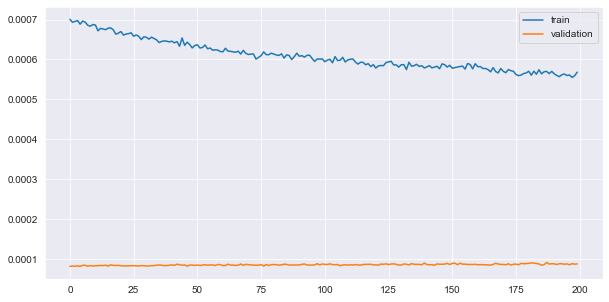

In [ ]:
# todo: plot the train and validation loss by epoch

plt.figure(figsize=(10, 5))
plt.plot(train_loss_arr, label='train')
plt.plot(val_loss_arr, label='validation')
plt.legend()
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار f1 score بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

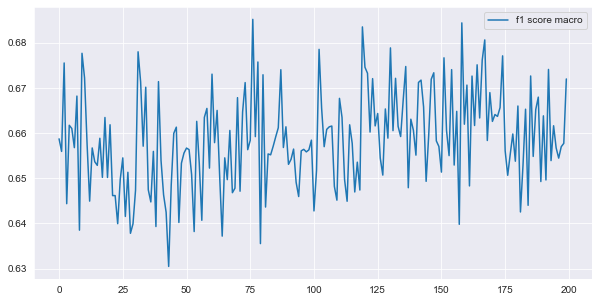

In [ ]:
# todo: plot the f1 score by epoch

plt.figure(figsize=(10, 5))
plt.plot(f1_macro_scores, label='f1 score macro')
plt.legend()
plt.show()

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به مدلتان دهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [ ]:
# todo: evaluate the model on the test set
# print the required metrics
model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, test_loader, test_mode=True)
accuracy = accuracy_score(true_labels, predicted_labels)
f1_score_micro = f1_score(true_labels, predicted_labels, average='micro')
cm = confusion_matrix(true_labels, predicted_labels)
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_micro = precision_score(true_labels, predicted_labels, average='micro')
recall_micro = recall_score(true_labels, predicted_labels, average='micro')
print(f"Accuracy: {accuracy}")
print(f"Loss: {eval_loss}")
print(f"F1-Macro: {f1_score_macro}")
print(f"F1-Micro: {f1_score_micro}")
print(f"Confusion matrix: {cm}")
print(f"Macro-average precision: {precision_macro}")
print(f"Macro-average recall: {recall_macro}")
print(f"Micro-average precision: {precision_micro}")
print(f"Micro-average recall: {recall_micro}")

Test Epoch 200: 100%|██████████| 5/5 [00:00<00:00, 59.45it/s, loss=0.424, accuracy=0.854, f1_score_macro=0.668]

Accuracy: 0.8540145985401459
Loss: 0.4241170763969421
F1-Macro: 0.6683040098156837
F1-Micro: 0.8540145985401459
Confusion matrix: [[1990  155    4]
 [ 175 1475   33]
 [  18  215   45]]
Macro-average precision: 0.7532760126807254
Macro-average recall: 0.6547645909254917
Micro-average precision: 0.8540145985401459
Micro-average recall: 0.8540145985401459


<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [ ]:
def predict(x):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    embedding = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer).astype(np.float32)
    embedding = torch.tensor(embedding).unsqueeze(0).to(device)
    output = model(embedding)
    _, predicted = torch.max(output.data, 1)
    return categories[predicted.item()]

In [ ]:
predict('hardware and computerc architecture is good')

'cs.CV'

In [ ]:
PATH = "nn_fasttext_model.pt"

# Save
torch.save(model, PATH)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با استفاده از مدل های زبانی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت قرار است تا به کمک language modelهای از پیش آموزش شده 
و fine-tune کردن آن‌ها طبقه‌بند خودمان را درست کنیم.
</font>
</div>
   

## Requirements

In [ ]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import transformers
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support, precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
from pandarallel import pandarallel
from matplotlib import pyplot as plt

In [ ]:
pandarallel.initialize()
nltk.download('punkt')
nltk.download('stopwords')

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [ ]:
# read data
df = pd.read_csv('./data/arxiv/arxiv_data_210930-054931.csv')
df['category'] = df['terms'].apply(lambda l: eval(l)[0])
df = df.drop_duplicates(['titles']).drop_duplicates(['abstracts']).reset_index(drop=True)
df

,terms,titles,abstracts,category
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG
...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG


In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """

    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>

</font>
</div>

In [ ]:
# preprocess text
df['preprocessed'] = df['titles'].str.cat(df['abstracts'], ' ').parallel_apply(preprocess_text)
df

,terms,titles,abstracts,category,preprocessed
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG,"[multi-level, attention, pooling, graph, neura..."
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG,"[decision, forests, vs, deep, networks, concep..."
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG,"[power, robust, graph, convolutional, network,..."
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG,"[releasing, graph, neural, networks, different..."
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG,"[recurrence-aware, long-term, cognitive, netwo..."
...,...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML,"[experimental, study, graph-based, semi-superv..."
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML,"[bayesian, differential, privacy, posterior, s..."
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV,"[mining, spatio-temporal, data, industrializat..."
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG,"[wav2letter, end-to-end, convnet-based, speech..."


---------------------------------------- lengths statistics ----------------------------------------
count    41100.000000
mean       116.201460
std         29.988256
min         11.000000
25%         95.000000
50%        115.000000
75%        136.000000
max        303.000000
Name: preprocessed, dtype: float64


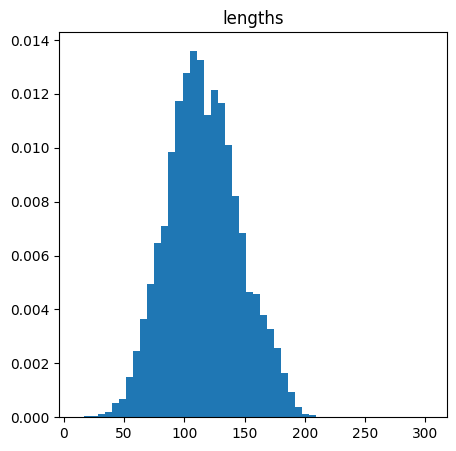

In [ ]:
# perform data cleaning and eda (you can add cells here)
# Text length

lens = df['preprocessed'].apply(len)

print(' lengths statistics '.center(100, '-'))
print(lens.describe())

plt.figure(figsize=(5, 5))
plt.hist(lens, bins=50, density=True)
plt.title('lengths')
plt.show()

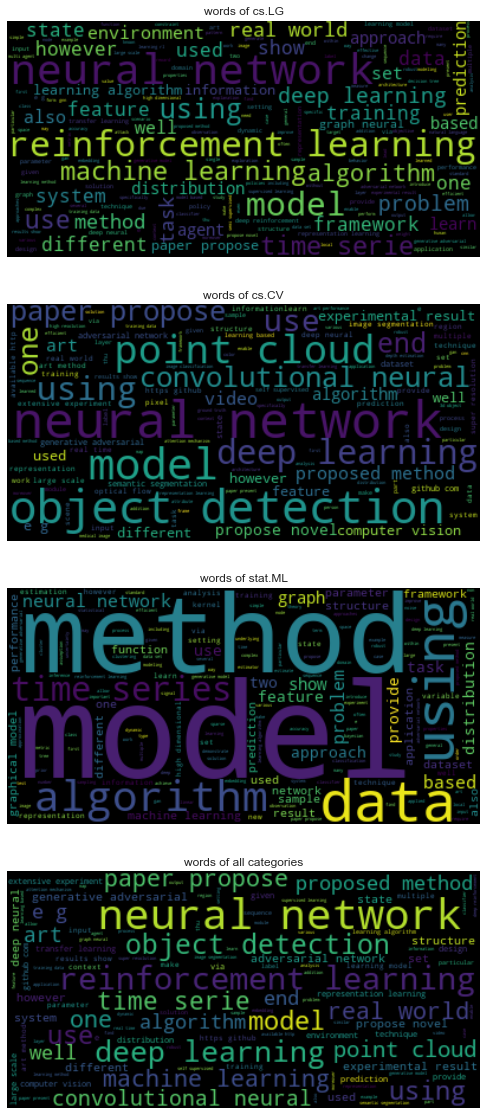

In [ ]:
# Word-clouds grouped by category

stops = nltk.corpus.stopwords.words('english')

categories = df.category.unique()

plt.figure(figsize=(10, 20))
for i, category in enumerate(categories):
    plt.subplot(len(categories) + 1, 1, i + 1)
    plt.imshow(WordCloud(stopwords=stops)\
               .generate(' '.join(df[df.category == category]['preprocessed'].str.join(' '))), interpolation='bilinear')
    plt.title(f'words of {category}')
    plt.axis('off')

plt.subplot(len(categories) + 1, 1, len(categories) + 1)
plt.imshow(WordCloud(stopwords=stops).generate(' '.join(df['preprocessed'].str.join(' '))), interpolation='bilinear')
plt.title('words of all categories')
plt.axis('off')

plt.show()

## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت برچسب‌ها و متن‌ها را برای مدل آماده کنید.
     برای متن هم عنوان و هم چکیده را در نظر بگیرید و این دو را به هم بچسبانید.
     به صورت رندم، ۱۰۰۰۰ داده را برای تمرین انتخاب کنید.
     همچنین جدا‌سازی داده‌ها را انجام دهید.
     در این بخش کافی است تا داده‌ها را به دو دسته‌ی آموزش و تست تقسیم کنید. 80% داده‌ها برای آموزش و 20% را برای تست قرار دهید.
    </font>
</div>

In [ ]:
df['X'] = df['preprocessed'].str.join(' ')
categories = sorted(df['category'].unique())
df['y'] = df['category'].parallel_apply(lambda c: categories.index(c))
df

,terms,titles,abstracts,category,preprocessed,X,y
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG,"[multi-level, attention, pooling, graph, neura...",multi-level attention pooling graph neural net...,1
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG,"[decision, forests, vs, deep, networks, concep...",decision forests vs deep networks conceptual s...,1
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG,"[power, robust, graph, convolutional, network,...",power robust graph convolutional network via g...,1
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG,"[releasing, graph, neural, networks, different...",releasing graph neural networks differential p...,1
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG,"[recurrence-aware, long-term, cognitive, netwo...",recurrence-aware long-term cognitive network e...,1
...,...,...,...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML,"[experimental, study, graph-based, semi-superv...",experimental study graph-based semi-supervised...,2
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML,"[bayesian, differential, privacy, posterior, s...",bayesian differential privacy posterior sampli...,2
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV,"[mining, spatio-temporal, data, industrializat...",mining spatio-temporal data industrialization ...,0
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG,"[wav2letter, end-to-end, convnet-based, speech...",wav2letter end-to-end convnet-based speech rec...,1


In [ ]:
random_state = 13

## Transformer based classification


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
مدلی که در این قسمت استفاده می‌کنیم مدل معروف bert می‌باشد.
    برای این کار از کتابخانه transformers استفاده می‌کنیم.
    مدل و tokenizer مربوطه را لود کنید.
    <br><b><u>
    به کمک داده‌های قسمت قبل و به کمک 
    Trainer
    مربوط به کتاب‌خانه‌ی transformers عملیات fine-tune را انجام دهید.
    <br>
    همچنین یکبار وزن‌های مدل برت را فریز کنید و فقط دسته‌بند مربوطه را آموزش دهید.
    </u></b><br>
    مطالعه‌ی بیشتر کتاب‌خانه‌ی transformers بسیار توصیه می‌شود.
    </font>
</div>

In [ ]:
MODEL_NAME = "bert-base-uncased"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# you can add more cells here if you need
encoder = transformers.AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(categories)).to(device)
tokenizer = transformers.AutoTokenizer.from_pretrained(MODEL_NAME)
data_collator = transformers.DataCollatorWithPadding(tokenizer=tokenizer)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        encoding = self.tokenizer(
            self.texts[index],
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_length,
            padding='max_length',
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()
        label = torch.tensor(self.labels[index])

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': label
        }

dataset = CustomDataset(df['X'], df['y'], tokenizer, 512)

In [ ]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [
    int(len(dataset) * 0.8), len(dataset) - int(len(dataset) * 0.8),
])

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred.predictions.argmax(-1), eval_pred.label_ids
    return {"accuracy": accuracy_score(labels, predictions)}

In [ ]:
# fine tune bert and train model
training_args = transformers.TrainingArguments(
    output_dir='./bert_finetuned',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    save_steps=500,
    save_total_limit=2,
    save_strategy='steps',
    evaluation_strategy='steps',
    eval_steps=500,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    dataloader_num_workers=0,
    gradient_accumulation_steps=1,
    seed=random_state,
    logging_dir='./logs',
    logging_steps=100,
    logging_first_step=True,
    report_to='none',
)

trainer = transformers.Trainer(
    model=encoder,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,  # Specify the metric calculation function
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
500,0.368400,0.370620,0.863625
1000,0.370300,0.374009,0.859732
1500,0.343000,0.341312,0.868613
2000,0.354500,0.330499,0.875426


TrainOutput(global_step=2055, training_loss=0.363570490008143, metrics={'train_runtime': 4356.7875, 'train_samples_per_second': 7.547, 'train_steps_per_second': 0.472, 'total_flos': 8651169174896640.0, 'train_loss': 0.363570490008143, 'epoch': 1.0})

In [ ]:
# freeze bert weights and then train model_2

# Freeze the BERT model weights
for param in encoder.base_model.parameters():
    param.requires_grad = False

training_args = transformers.TrainingArguments(
    output_dir='./bert_freesed',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    save_steps=500,
    save_total_limit=2,
    save_strategy='steps',
    evaluation_strategy='steps',
    eval_steps=500,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    dataloader_num_workers=0,
    gradient_accumulation_steps=1,
    seed=random_state,
    logging_dir='./logs',
    logging_steps=100,
    logging_first_step=True,
    report_to='none',
)

trainer = transformers.Trainer(
    model=encoder,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,  # Specify the metric calculation function
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
500,0.233300,0.342398,0.872263
1000,0.256600,0.346311,0.874088
1500,0.257000,0.348184,0.873844
2000,0.348500,0.348007,0.872506


TrainOutput(global_step=2055, training_loss=0.26551037536630373, metrics={'train_runtime': 2461.5869, 'train_samples_per_second': 13.357, 'train_steps_per_second': 0.835, 'total_flos': 8651169174896640.0, 'train_loss': 0.26551037536630373, 'epoch': 1.0})

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به هر دو مدل بدهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [ ]:
# you can add more cells here if you need
from tqdm import tqdm

def predict_dataset(model, dataset):
    model.eval()
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=False)
    predictions = []
    labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, total=len(dataloader)):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            label = batch['labels'].to(device)

            output = model(input_ids, attention_mask=attention_mask)
            predictions.extend(torch.argmax(output.logits, dim=1).tolist())
            labels.extend(label.tolist())

    return predictions, labels

encoder.load_state_dict(torch.load('./bert_finetuned/checkpoint-2000/pytorch_model.bin'))
y_pred_transformers, labels = predict_dataset(encoder, test_dataset)
acc_1 = accuracy_score(labels, y_pred_transformers)
f1_macro_1 = f1_score(labels, y_pred_transformers, average='macro')
f1_micro_1 = f1_score(labels, y_pred_transformers, average='micro')
confusion_matrix_1 = confusion_matrix(labels, y_pred_transformers)
macro_average_precision_1 = precision_score(labels, y_pred_transformers, average='macro')
macro_average_recall_1 = recall_score(labels, y_pred_transformers, average='macro')
micro_average_precision_1 = precision_score(labels, y_pred_transformers, average='micro')
micro_average_recall_1 = recall_score(labels, y_pred_transformers, average='micro')

print('Model 1')
print('accuracy: ', acc_1)
print('f1_macro: ', f1_macro_1)
print('f1_micro: ', f1_micro_1)
print('confusion_matrix: ', confusion_matrix_1)
print('macro_average_precision: ', macro_average_precision_1)
print('macro_average_recall: ', macro_average_recall_1)
print('micro_average_precision: ', micro_average_precision_1)
print('micro_average_recall: ', micro_average_recall_1)


encoder.load_state_dict(torch.load('./bert_freesed/checkpoint-1000/pytorch_model.bin'))
y_pred_transformers_2, labels = predict_dataset(encoder, test_dataset)
acc_2 = accuracy_score(labels, y_pred_transformers_2)
f1_macro_2 = f1_score(labels, y_pred_transformers_2, average='macro')
f1_micro_2 = f1_score(labels, y_pred_transformers_2, average='micro')
confusion_matrix_2 = confusion_matrix(labels, y_pred_transformers_2)
macro_average_precision_2 = precision_score(labels, y_pred_transformers_2, average='macro')
macro_average_recall_2 = recall_score(labels, y_pred_transformers_2, average='macro')
micro_average_precision_2 = precision_score(labels, y_pred_transformers_2, average='micro')
micro_average_recall_2 = recall_score(labels, y_pred_transformers_2, average='micro')

100%|██████████| 129/129 [04:56<00:00,  2.30s/it]


Model 1
accuracy:  0.8754257907542579
f1_macro:  0.7353738029789724
f1_micro:  0.8754257907542579
confusion_matrix:  [[4140  206    3]
 [ 272 2865  186]
 [  33  324  191]]
macro_average_precision:  0.7593010755641437
macro_average_recall:  0.7208852856206774
micro_average_precision:  0.8754257907542579
micro_average_recall:  0.8754257907542579


100%|██████████| 129/129 [04:57<00:00,  2.30s/it]


In [ ]:
print('Model 2')
print('accuracy: ', acc_2)
print('f1_macro: ', f1_macro_2)
print('f1_micro: ', f1_micro_2)
print('confusion_matrix: ', confusion_matrix_2)
print('macro_average_precision: ', macro_average_precision_2)
print('macro_average_recall: ', macro_average_recall_2)
print('micro_average_precision: ', micro_average_precision_2)
print('micro_average_recall: ', micro_average_recall_2)

Model 2
accuracy:  0.8740875912408759
f1_macro:  0.7357483420702303
f1_micro:  0.8740875912408759
confusion_matrix:  [[4131  214    4]
 [ 265 2857  201]
 [  32  319  197]]
macro_average_precision:  0.7552498139563353
macro_average_recall:  0.7230426191949796
micro_average_precision:  0.8740875912408759
micro_average_recall:  0.8740875912408759


<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
     نتایج به دست آمده برای دو مدل آموزش داده شده را مقایسه کنید و سپس نتایج مدل بهتر را با خروجی‌های fasttext که در قسمت قبل استخراج کردید نیز مقایسه کنید و تحلیل‌های خود را بنویسید.
    <br>
    <br>
    </font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
مقایسه نتایج مدل‌های مختلف در جدول زیر نمایش داده شده‌است. همانطور که مشخص است، مدل
BERT
عملکرد بهتری نشان داده است، که این موضوع قابل انتظار هم هست.
همچنین پیش از فریز کردن BERT،
مدل عملکرد بهتری از خود نشان داده‌است.
</font>
</div>

| Model               | Acc   | F1    | Recall | Precision |
|---------------------|-------|-------|--------|-----------|
| NN with FastText    | 85.4  | 66.83 | 65.48  | 75.33     |
| BERT-base finetuned | 87.54 | 73.54 | 72.09  | 75.93     |
| BERT-base freezed   | 87.41 | 73.57 | 72.3   | 75.52     |

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [ ]:
def predict(x: str, model):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    preprocessed = preprocess_text(x)
    tokens = tokenizer(' '.join(preprocessed),
                       add_special_tokens=True,
                       truncation=True,
                       return_tensors='pt')
    input_ids = tokens['input_ids'].to(device)
    attention_mask = tokens['attention_mask'].to(device)
    output = model(input_ids, attention_mask=attention_mask)
    category = categories[torch.argmax(output.logits, dim=1).tolist()[0]]
    return category

In [ ]:
predict('hardware is very good.', encoder)

'cs.CV'

In [ ]:
!cp -r ./bert_finetuned/checkpoint-2000 ./drive/MyDrive/bert-finetuned-best-2000

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جستجو و بازیابی اسناد در دسته‌های مختلف</b>
    </h2>
</font>
<font face="XB Zar" size=4>
در این بخش می‌خواهیم به تابع search مربوط به فاز قبل قابلیتی اضافه کنیم که بر اساس آن بتوان جستجو و بازیابی پرسمان را به یک دسته خاص محدود کرد و یا مشخص کرد که جستجو بر روی تمام اسناد انجام شود. همانند فاز قبل:
<br>
 پرسمانی که از کاربر می‌گیرید را در مجموعه اسناد نمایه شده جست و جو کنید. توجه داشته باشید که جست و جویی که انجام می‌دهید هم باید در عنوان مقاله و هم در چکیده آن انجام شود. در نهایت، اسناد باید به ترتیب امتیاز نهایی‌شان برگردانده شوند. امتیاز نهایی هر سند نیز از جمع وزن‌دار امتیاز جستجو در عنوان و جستجو در چکیده مقاله به دست می‌آید.
<br>
ورودی‌های تابع search در این فاز، همانند فاز قبل است؛ تنها ورودی category به آن اضافه شده است. در صورتی که ورودی category برابر all باشد، جستجو در تمامی اسناد انجام می‌شود. در صورتی که category برابر نام یک دسته باشد، جستجو تنها در دسته گفته شده انجام می‌شود.
<br>
(برای این قسمت از کدهایی که در فاز قبل زده‌اید استفاده کنید و قابلیت گفته شده را به آن اضافه کنید.)
</font>
</div>

In [ ]:
from collections import Counter
from dataclasses import dataclass
from functools import lru_cache
import math
from termcolor import colored
import os
from typing import Dict, Iterable, Literal, Union, Set, Optional, List, Tuple

from nltk.metrics import distance as nltkd
import numpy as np
import pandas as pd
import spacy

In [ ]:
nlp = spacy.load('en_core_web_md')

In [ ]:
@dataclass
class Token:
    processed: str
    actual: str
    i: int
    idx: int

    @staticmethod
    def from_spacy_token(token) -> "Token":
        return Token(token.lemma_.lower(), token.text, token.i, token.idx)

    def __repr__(self):
        return self.processed

In [ ]:
def batch_clean_data(texts: List[str], batch_size: int = 128) -> List[List[Token]]:
    """Preprocesses the text with tokenization, case folding, stemming and lemmatization, and punctuations

    Parameters
    ----------
    texts : List[str]
        A list of titles or abstracts of articles
    batch_size : int, optional
        The number of texts to be processed at a time, by default 128

    Returns
    -------
    List[List[Doc]]
        A list of lists of tokens
    """
    tokens = nlp.pipe(texts, batch_size=batch_size, n_process=os.cpu_count())
    return [[Token.from_spacy_token(token) for token in doc if not token.is_punct] for doc in tokens]


def clean_data(text: str) -> List[Token]:
    """Preprocesses the text with tokenization, case folding, stemming and lemmatization, and punctuations

    Parameters
    ----------
    text : str
        The title or abstract of an article

    Returns
    -------
    list
        A list of tokens
    """
    return batch_clean_data([text])[0]

In [ ]:
def find_stop_words(all_text: List[str], num_token: int = 30) -> Set[str]:
    """Detects stop-words

     Parameters
    ----------
    all_text : list of all tokens
        (result of clean_data(text) for all the text)

    num_token : int
        number of stop words to be detected

    Returns
    -------
    Return Value is optional but must print the stop words and number of their occurence
    """
    counter = Counter(all_text)
    most_occur = counter.most_common(num_token)
    print(pd.DataFrame(most_occur, columns=['token', 'count']))
    return set([token for token, _ in most_occur])

In [ ]:
class Corpus:

    def __init__(self, dataset_path: str, stop_topk: int = 30):
        self.data = self.load_data(dataset_path)
        self.stop_topk = stop_topk

    @staticmethod
    def load_data(dataset_path: str) -> pd.DataFrame:
        df = pd.read_csv(dataset_path).fillna('')
        df['category'] = df['terms'].apply(lambda l: eval(l)[0])
        df = df.drop_duplicates(['titles']).drop_duplicates(['abstracts']).reset_index(drop=True)
        df['paper_id'] = df.index.astype(str)
        return df

    @property
    @lru_cache
    def cleaned_documents(self) -> Dict[str, Dict[str, List[Token]]]:
        return {
            paper_id: {
                'title': cleaned_titles,
                'abstract': cleaned_abstracts,
                'category': category,
            }
            for paper_id, cleaned_titles, cleaned_abstracts, category in zip(
                self.data['paper_id'].tolist(),
                batch_clean_data(self.data['titles'].tolist()),
                batch_clean_data(self.data['abstracts'].tolist()),
                self.data['category'].tolist(),
            )
        }

    @property
    @lru_cache
    def stop_tokens(self) -> Set[str]:
        return find_stop_words(
            [token.processed
             for tokens in self.cleaned_documents.values()
             for token in tokens['title'] + tokens['abstract']],
            num_token=self.stop_topk,
        )

    @property
    @lru_cache
    def non_stop_documents(self) -> Dict[str, Dict[str, List[Token]]]:
        return {
            paper_id: {
                'title': [token for token in tokens['title'] if token.processed not in self.stop_tokens],
                'abstract': [token for token in tokens['abstract'] if token.processed not in self.stop_tokens],
                'category': tokens['category'],
            }
            for paper_id, tokens in self.cleaned_documents.items()
        }

    @property
    @lru_cache
    def document_ids_by_category(self) -> Dict[str, Set[str]]:
        return {
            category: set(self.data[self.data['category'] == category]['paper_id'].tolist())
            for category in self.data['category'].unique()
        }

    def __len__(self) -> int:
        return len(self.data)

In [ ]:
class TrieNode:

    def __init__(self):
        self.children: Dict[str, TrieNode] = {}
        self.idx_in_doc: Dict[str, Dict[Literal['title', 'abstract'], Set[int]]] = {}
        self.is_end = False

    def insert(self, doc_id: str, doc_section: Literal['title', 'abstract'], token: Token):
        node = self
        for char in token.processed:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
            if doc_id not in node.idx_in_doc:
                node.idx_in_doc[doc_id] = {'title': set(), 'abstract': set()}
            node.idx_in_doc[doc_id][doc_section].add(token.idx)
        node.is_end = True

    def search(self, token: str) -> Optional[
        Dict[str, Dict[Literal['title', 'abstract'], Set[int]]]]:
        node = self
        for char in token:
            if char not in node.children:
                return None
            node = node.children[char]
        if node.is_end:
            return node.idx_in_doc
        return None

    def remove_document(self, doc_id: str):
        if doc_id in self.idx_in_doc:
            del self.idx_in_doc[doc_id]
        for child in self.children.values():
            child.remove_document(doc_id)

    def traverse_words(self, prefix: str = '') -> Iterable[Tuple[str,
    Dict[str, Dict[Literal['title', 'abstract'], Set[int]]]]]:
        if self.is_end:
            yield prefix, {
                doc_id: {
                    k: list(v) for k, v in doc.items()
                }
                for doc_id, doc in self.idx_in_doc.items()
            }

        for char, child in self.children.items():
            yield from child.traverse_words(prefix + char)

    @classmethod
    def from_words(cls, words: Iterable[Tuple[str,
    Dict[str, Dict[Literal['title', 'abstract'], Iterable[int]]]]]) -> 'TrieNode':
        root = cls()
        for word, idx_in_doc in words:
            for doc_id, doc in idx_in_doc.items():
                for doc_section, indices in doc.items():
                    for idx in indices:
                        token = Token(word, '', -1, idx)
                        root.insert(doc_id, doc_section, token)
        return root

    def to_dict(self):
        return {
            'children': {char: child.to_dict() for char, child in self.children.items()},
            'idx_in_doc': self.idx_in_doc,
            'is_end': self.is_end,
        }

    @classmethod
    def from_dict(cls, data: Dict):
        node = cls()
        node.children = {char: cls.from_dict(child) for char, child in data['children'].items()}
        node.i_in_doc = data['i_in_doc']
        node.is_end = data['is_end']
        return node

In [ ]:
WORD_BOUNDARY_CHAR = '¶'


def get_word_bigrams(word: str) -> Iterable[str]:
    """
    Returns the bigrams of the given word

    Parameters
    ----------
    word: str
        The word to get the bigrams from

    Returns
    -------
    list
        A list of bigrams
    """
    word = WORD_BOUNDARY_CHAR + word + WORD_BOUNDARY_CHAR
    return [word[i:i + 2] for i in range(len(word) - 1)]


def create_bigram_index(corpus: Corpus) -> Dict[str, Dict[str, int]]:
    """
    Creates a bigram index for the spell correction

    Parameters
    ----------
    corpus: Corpus
        The corpus to generate the bigram index from

    Returns
    -------
    dict
        A dictionary of bigrams and their occurence
    """
    bigram_index: Dict[str, Dict[str, int]] = {}
    seen_words = set()
    for doc_id, doc in corpus.cleaned_documents.items():
        for section_name, doc_section in doc.items():
            if section_name == 'category':
                continue
            for token in doc_section:
                if token.actual in seen_words:
                    continue
                seen_words.add(token.actual)
                for bigram in get_word_bigrams(token.actual):
                    if bigram not in bigram_index:
                        bigram_index[bigram] = {}
                    if token.actual not in bigram_index[bigram]:
                        bigram_index[bigram][token.actual] = 0
                    bigram_index[bigram][token.actual] += 1
    return bigram_index

In [ ]:
def correct_text(bigram_index: Dict[str, Dict[str, int]], text: str, similar_words_limit: int = 20) -> str:
    """
    Correct the give query text, if it is misspelled

    Parameters
    ---------
    bigram_index: Dict[str, Dict[str, int]]
        The bigram index to search in
    text: str
        The query text
    similar_words_limit: int
        The number of similar words

    Returns
    ---------
    str
        The corrected form of the given text
    """
    corrected_text = ''.join(text)
    for token in nlp(text):
        word = token.text
        if token.is_punct:
            continue
        word_occurences: Dict[str, int] = {}
        for bigram in get_word_bigrams(word):
            for posting, occurence in bigram_index.get(bigram, {}).items():
                if posting not in word_occurences:
                    word_occurences[posting] = 0
                word_occurences[posting] += occurence
        jaccard_scores = {
            posting: word_occurence / (len(word) + len(posting) + 2 - word_occurence)
            for posting, word_occurence in word_occurences.items()
        }
        similar_words = sorted(jaccard_scores, key=jaccard_scores.get, reverse=True)[:similar_words_limit]
        min_edit_distance = float('inf')
        corrected_word = word
        for similar_word in similar_words:
            if (edit_distance := nltkd.edit_distance(similar_word, word)) < min_edit_distance:
                min_edit_distance = edit_distance
                corrected_word = similar_word
        corrected_text = corrected_text.replace(word, corrected_word)
    return corrected_text

In [ ]:
def construct_positional_indexes(corpus: Corpus):
    """
    Get processed data and insert words in that into a trie and construct postional_index and posting lists after wards.

    Parameters
    ----------
    corpus: Corpus
        processed data

    Return
    ----------
    docs:
        list of docs with specificied id, title, abstract.
    """
    trie = TrieNode()
    for doc_id, doc in corpus.non_stop_documents.items():
        for doc_section, tokens in doc.items():
            if doc_section == 'category':
                continue
            for token in tokens:
                trie.insert(doc_id, doc_section, token)
    return trie

In [ ]:
def write_json(o, path: str):
    import json
    with open(path, 'w') as f:
        json.dump(o, f)


def get_offset(gap): return bin(gap)[3:]


def get_length(offset): return unary_codification(len(offset)) + '0'


def unary_codification(gap): return '1' * gap


def get_gaps_list(posting_lists): return [posting_lists[0]] + [posting_lists[i] - posting_lists[i - 1] for i in
                                                               range(1, len(posting_lists))]


def gamma_encoding(postings):
    if not postings:
        return ''
    postings = [p + 1 for p in postings]
    return ''.join([get_length(get_offset(gap)) + get_offset(gap) for gap in get_gaps_list(postings)])


def write_gamma_code(words: Iterable[Tuple[str, Dict[str, Dict[Literal['title', 'abstract'], Iterable[int]]]]], path: str):
    with open(path, 'wb') as f:
        for word, posting_lists in words:
            encoded_word = word.encode('utf-8')
            f.write(len(encoded_word).to_bytes(1, 'big'))
            f.write(encoded_word)
            f.write(len(posting_lists).to_bytes(4, 'big'))
            for doc_id, doc in posting_lists.items():
                encoded_doc_id = doc_id.encode('utf-8')
                f.write(len(encoded_doc_id).to_bytes(1, 'big'))
                f.write(encoded_doc_id)
                title_postings = sorted(doc['title'])
                encoded_title_postings = gamma_encoding(title_postings)
                encoding_length = len(encoded_title_postings)
                octet_encoded_title_postings = '0b' + \
                                               '0' * (8 - len(encoded_title_postings) % 8) + \
                                               encoded_title_postings
                n_bytes = len(octet_encoded_title_postings) // 8
                f.write(n_bytes.to_bytes(1, 'big'))
                f.write(encoding_length.to_bytes(2, 'big'))
                f.write(int(octet_encoded_title_postings, 2).to_bytes(n_bytes, 'big'))

                encoded_abstract_postings = gamma_encoding(sorted(doc['abstract']))
                encoding_length = len(encoded_abstract_postings)
                octet_encoded_abstract_postings = '0b' + \
                                                  '0' * (8 - len(encoded_abstract_postings) % 8) + \
                                                  encoded_abstract_postings
                n_bytes = len(octet_encoded_abstract_postings) // 8
                f.write(n_bytes.to_bytes(1, 'big'))
                f.write(encoding_length.to_bytes(2, 'big'))
                f.write(int(octet_encoded_abstract_postings, 2).to_bytes(n_bytes, 'big'))


def vb_encoding_number(n):
    b = []
    while True:
        b = [n % 128] + b
        n = n // 128
        if n == 0:
            break
    b[-1] += 128
    return bytes(b)


def vb_encoding(numbers):
    return b''.join([vb_encoding_number(n) for n in numbers])


def write_vb_code(words: Iterable[Tuple[str, Dict[str, Dict[Literal['title', 'abstract'], Iterable[int]]]]], path: str):
    with open(path, 'wb') as f:
        for word, posting_lists in words:
            encoded_word = word.encode('utf-8')
            f.write(len(encoded_word).to_bytes(1, 'big'))
            f.write(encoded_word)
            f.write(len(posting_lists).to_bytes(4, 'big'))
            for doc_id, doc in posting_lists.items():
                encoded_doc_id = doc_id.encode('utf-8')
                f.write(len(encoded_doc_id).to_bytes(1, 'big'))
                f.write(encoded_doc_id)
                title_postings = doc['title']
                encoded_title_postings = vb_encoding(title_postings)
                encoding_length = len(encoded_title_postings)
                f.write(encoding_length.to_bytes(4, 'big'))
                f.write(encoded_title_postings)

                abstract_postings = doc['abstract']
                encoded_abstract_postings = vb_encoding(abstract_postings)
                encoding_length = len(encoded_abstract_postings)
                f.write(encoding_length.to_bytes(4, 'big'))
                f.write(encoded_abstract_postings)


def store_index(trie: TrieNode, path: str, compression_type: str) -> int:
    """Stores the index in a file

    Parameters
    ----------
    trie: TrieNode
        trie of corpus
    path : str
        Path to store the file
    compression_type : str
        Could be one of the followings:
        - no-compression
        - gamma-code
        - variable-byte

    Return
    ----------
    int
        The size of the stored file
    """
    os.makedirs(os.path.dirname(path), exist_ok=True)
    word_list = trie.traverse_words()
    if compression_type == "no-compression":
        write_json(list(word_list), path)
    elif compression_type == 'gamma-code':
        write_gamma_code(word_list, path)
    elif compression_type == 'variable-byte':
        write_vb_code(word_list, path)
    else:
        raise ValueError("compression_type should be one of the followings: no-compression, gamma-code, variable-byte")
    return os.stat(path).st_size


In [ ]:
def unary_decodification(gap): return sum(map(int, gap))


def gamma_decoding(gamma):
    num, length, offset, aux, res = 0, "", "", 0, []
    while gamma != "":
        aux = gamma.find("0")
        length = gamma[:aux]
        if length == "":
            res.append(1); gamma = gamma[1:]
        else:
            offset = "1" + gamma[aux + 1:aux + 1 + unary_decodification(length)]
            res.append(int(offset, 2))
            gamma = gamma[aux + 1 + unary_decodification(length):]
    return [int(p) - 1 for p in np.cumsum(res)]


def read_gamma_code(path: str) -> Iterable[Tuple[str, Dict[str, Dict[Literal['title', 'abstract'], Iterable[int]]]]]:
    with open(path, 'rb') as f:
        while True:
            word_length = f.read(1)
            if not word_length:
                break
            word_length = int.from_bytes(word_length, 'big')
            word = f.read(word_length).decode('utf-8')
            n_posting_lists = int.from_bytes(f.read(4), 'big')
            posting_lists = {}
            for _ in range(n_posting_lists):
                doc_id_length = int.from_bytes(f.read(1), 'big')
                doc_id = f.read(doc_id_length).decode('utf-8')
                title_postings_n_bytes = int.from_bytes(f.read(1), 'big')
                title_posting_length = int.from_bytes(f.read(2), 'big')
                title_postings_int = int.from_bytes(f.read(title_postings_n_bytes), 'big')
                title_postings_bin = bin(title_postings_int)
                if title_posting_length == 0:
                    title_postings = []
                else:
                    aligned_title_postings_bin = '0' * (title_posting_length - len(title_postings_bin[2:])) + title_postings_bin[2:]
                    title_postings = gamma_decoding(aligned_title_postings_bin)

                abstract_postings_n_bytes = int.from_bytes(f.read(1), 'big')
                abstract_posting_length = int.from_bytes(f.read(2), 'big')
                abstract_postings_int = int.from_bytes(f.read(abstract_postings_n_bytes), 'big')
                abstract_postings_bin = bin(abstract_postings_int)
                if abstract_posting_length == 0:
                    abstract_postings = []
                else:
                    aligned_abstract_postings_bin = '0' * (abstract_posting_length - len(abstract_postings_bin[2:])) + abstract_postings_bin[2:]
                    abstract_postings = gamma_decoding(aligned_abstract_postings_bin)

                posting_lists[doc_id] = {
                    'title': title_postings,
                    'abstract': abstract_postings,
                }
            yield word, posting_lists


def vb_decoding(encoded: bytes):
    numbers = []
    n = 0
    for b in encoded:
        n = n * 128 + (b % 128)
        if b >= 128:
            numbers.append(n)
            n = 0
    return numbers


def read_vb_code(path: str) -> Iterable[Tuple[str, Dict[str, Dict[Literal['title', 'abstract'], Iterable[int]]]]]:
    with open(path, 'rb') as f:
        while True:
            word_length = f.read(1)
            if not word_length:
                break
            word_length = int.from_bytes(word_length, 'big')
            word = f.read(word_length).decode('utf-8')
            n_posting_lists = int.from_bytes(f.read(4), 'big')
            posting_lists = {}
            for _ in range(n_posting_lists):
                doc_id_length = int.from_bytes(f.read(1), 'big')
                doc_id = f.read(doc_id_length).decode('utf-8')
                title_postings_n_bytes = int.from_bytes(f.read(4), 'big')
                title_postings = vb_decoding(f.read(title_postings_n_bytes))

                abstract_postings_n_bytes = int.from_bytes(f.read(4), 'big')
                abstract_postings = vb_decoding(f.read(abstract_postings_n_bytes))

                posting_lists[doc_id] = {
                    'title': title_postings,
                    'abstract': abstract_postings,
                }
            yield word, posting_lists


def load_index(path: str, compression_type: str) -> TrieNode:
    """Loads the index from a file

    Parameters
    ----------
    path : str
        Path of the file to load from

    compression_type : str
        Could be one of the followings:
        - no-compression
        - gamma-code
        - variable-byte
    """
    if compression_type == 'no-compression':
        import json
        with open(path, 'r') as f:
            word_list = json.load(f)
        return TrieNode.from_words(word_list)
    if compression_type == 'gamma-code':
        return TrieNode.from_words(read_gamma_code(path))
    if compression_type == 'variable-byte':
        return TrieNode.from_words(read_vb_code(path))
    else:
        raise ValueError("compression_type should be one of the followings: no-compression, gamma-code, variable-byte")

In [92]:
def logarithmic_w_tf(tf: Dict[str, float]) -> Dict[str, float]:
    return {
        token: 1 + math.log(token_tf) if token_tf > 0 else 0
        for token, token_tf in tf.items()
    }


def cosine_normalization(w: Iterable[float]) -> float:
    return math.sqrt(sum(w_i ** 2 for w_i in w))


def get_df(token_search_results: Dict[str, Dict[str, Dict[Literal['title', 'abstract'], List[int]]]]) -> Dict[str, int]:
    return {
        token: len(search_results)
        for token, search_results in token_search_results.items()
    }


def query_tf_idf(query_tokens: List[str],
                 token_search_results: Dict[str, Dict[str, Dict[Literal['title', 'abstract'], List[int]]]],
                 score_type: str) -> Dict[str, float]:
    tf = {
        token: query_tokens.count(token)
        for token in token_search_results
    }
    if score_type[0] == 'n':
        w_tf = tf
    elif score_type[0] == 'l':
        w_tf = logarithmic_w_tf(tf)
    else:
        raise ValueError(f'tf method {score_type[0]} not supported')

    if score_type[1] == 'n':
        w_idf = {token: 1 for token in token_search_results}
    else:
        raise ValueError(f'idf method {score_type[1]} not supported')

    if score_type[2] == 'n':
        normalization = 1
    elif score_type[2] == 'c':
        normalization = cosine_normalization(w_tf.values())
    else:
        raise ValueError(f'normalization method {score_type[1]} not supported')

    w = {
        token: w_tf[token] * w_idf[token] / normalization
        for token in token_search_results
    }
    return w


def doc_tf_idf(corpus: Corpus,
               doc_section: str,
               token_search_results: Dict[str, Dict[str, Dict[Literal['title', 'abstract'], List[int]]]],
               query_w: Dict[str, float],
               score_type: str):
    if score_type[1] == 't':
        df = get_df(token_search_results)
        w_idf = {
            token: math.log(len(corpus) / token_df)
            for token, token_df in df.items()
        }
    else:
        raise ValueError(f'idf method {score_type[1]} not supported')

    all_documents = set()
    for search_results in token_search_results.values():
        all_documents.update(search_results.keys())

    doc_scores = {}
    for doc_id in all_documents:
        doc_tf = {
            token: len(search_results[doc_id][doc_section])
            for token, search_results in token_search_results.items()
            if doc_id in search_results
        }
        if score_type[0] == 'l':
            doc_w_tf = logarithmic_w_tf(doc_tf)
        else:
            raise ValueError(f'tf method {score_type[0]} not supported')

        if score_type[2] == 'n':
            doc_normalization = 1
        elif score_type[2] == 'c':
            doc_normalization = cosine_normalization(doc_w_tf.values())
        else:
            raise ValueError(f'normalization method {score_type[1]} not supported')

        doc_w = {
            token: doc_w_tf[token] * w_idf[token] / doc_normalization
            for token in doc_w_tf
            if doc_normalization > 0
        }
        doc_scores[doc_id] = sum(
            query_w[token] * doc_w[token]
            for token in query_w
            if token in doc_w
        )
    return doc_scores


def tf_idf(corpus: Corpus, doc_section: Literal['title', 'abstract'],
           token_search_results: Dict[str, Dict[str, Dict[Literal['title', 'abstract'], List[int]]]],
           query_tokens: List[str], score_type: str) -> Dict[str, float]:
    doc_score_type, query_score_type = score_type.split('-')
    query_w = query_tf_idf(query_tokens, token_search_results, query_score_type)
    return doc_tf_idf(corpus, doc_section, token_search_results, query_w, doc_score_type)


def okapi25(corpus: Corpus, doc_section: Literal['title', 'abstract'],
            token_search_results: Dict[str, Dict[str, Dict[Literal['title', 'abstract'], List[int]]]],
            query_tokens: List[str], k1: float = 1.2, b: float = 0.75) -> Dict[str, float]:
    all_documents = set()
    for search_results in token_search_results.values():
        all_documents.update(search_results.keys())

    df = get_df(token_search_results)
    idf = {
        token: math.log((len(all_documents) - token_df + 0.5) / (token_df + 0.5) + 1)
        for token, token_df in df.items()
    }
    f = {
        token: {
            doc_id: len(doc[doc_section])
            for doc_id, doc in search_results.items()
        }
        for token, search_results in token_search_results.items()
    }
    dl = {
        doc_id: len(corpus.non_stop_documents[doc_id][doc_section])
        for doc_id in all_documents
    }
    avgdl = sum(
        len(corpus.non_stop_documents[doc_id][doc_section])
        for doc_id in all_documents
    ) / len(all_documents)

    doc_scores = {}
    for doc_id in all_documents:
        doc_scores[doc_id] = sum(
            idf[token] * (
                    f[token].get(doc_id, 0.0) * (k1 + 1)
            ) / (
                    f[token].get(doc_id, 0.0) + k1 * (1 - b + b * dl[doc_id] / avgdl)
            )
            for token in query_tokens
        )
    return doc_scores


@dataclass
class SearchResult:
    doc_id: str
    score: float
    title: str
    abstract: str
    category: str


def highlight_text(text: str, highlight_starts: List[int]) -> str:
    result = ''
    last_index = 0
    highlight_starts = sorted(highlight_starts)
    for i, highlight_start in enumerate(highlight_starts):
        next_start = highlight_starts[i + 1] if i + 1 < len(highlight_starts) else len(text)
        if highlight_start == next_start:
            print(highlight_start, next_start, text, colored(text[highlight_start:], 'yellow'), highlight_starts)
        token = nlp(text[highlight_start:next_start])[0]
        highlight_length = len(token)
        result += text[last_index:highlight_start] + \
                  colored(text[highlight_start:highlight_start + highlight_length], 'red')
        last_index = highlight_start + highlight_length
    result += text[last_index:]
    return result


def search(corpus: Corpus, trie: TrieNode, bigram_index: Dict[str, Dict[str, int]], query: str, max_result_count: int,
           method: str = 'ltn-lnn', weight: float = 0.5, highlight: bool = False, print_result: bool = False, category: str = 'all') -> List[SearchResult]:
    """
        Finds relevant documents to query

        Parameters
        ---------------------------------------------------------------------------------------------------
        corpus: Corpus
            The corpus
        trie: TrieNode
            The trie
        bigram_index: Dict[str, Dict[str, int]]
            The bigram index
        query: str
            The query string
        max_result_count: int
            Return top 'max_result_count' docs which have the highest scores.
            notice that if max_result_count = -1, then you have to return all docs
        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'
        weight: float
            weight of abstract score
        highlight: bool
            If True, highlight the query tokens in search results
        print_result: bool
            If True, print the results in a readable format
        category: str
            If 'all', search in all documents, else search in documents of the given category

        Returns
        ----------------------------------------------------------------------------------------------------
        list
            Retrieved documents with snippet
    """
    corrected_query = correct_text(bigram_index, query)
    if print_result:
        print(f'Query'.center(100, '-'))
        print(corrected_query.center(100, '-'))
        print('-' * 100)
    query_tokens = [token.processed
                    for token in clean_data(corrected_query)
                    if token.processed not in corpus.stop_tokens]
    token_search_results: Dict[str, Dict[str, Dict[Literal['title', 'abstract'], List[int]]]] = {
        token: trie.search(token) or {}
        for token in query_tokens
    }
    token_search_results = {
        token: search_results if category == 'all' else {
            doc_id: doc
            for doc_id, doc in search_results.items()
            if doc_id in corpus.document_ids_by_category[category]
        }
        for token, search_results in token_search_results.items()
    }
    if '-' in method:
        title_doc_scores = tf_idf(corpus, 'title', token_search_results, query_tokens, method)
        abstract_doc_scores = tf_idf(corpus, 'abstract', token_search_results, query_tokens, method)
    elif method == 'okapi25':
        title_doc_scores = okapi25(corpus, 'title', token_search_results, query_tokens)
        abstract_doc_scores = okapi25(corpus, 'abstract', token_search_results, query_tokens)
    else:
        raise ValueError(f'Expected the method to be one of \'ltn-lnn\', \'ltc-lnc\', or \'okapi25\', bot got {method}')
    doc_scores = {
        doc_id: weight * abstract_doc_scores.get(doc_id, 0.0) + (1 - weight) * title_doc_scores.get(doc_id, 0.0)
        for doc_id in set(title_doc_scores.keys()) | set(abstract_doc_scores.keys())
    }
    if highlight:
        doc_highlights = {
            doc_id: {
                'title': sum([
                    list(token_search_results[token][doc_id]['title'])
                    for token in query_tokens
                    if token in token_search_results and doc_id in token_search_results[token]
                ], []),
                'abstract': sum([
                    list(token_search_results[token][doc_id]['abstract'])
                    for token in query_tokens
                    if token in token_search_results and doc_id in token_search_results[token]
                ], [])
            }
            for doc_id in doc_scores
        }
    else:
        doc_highlights = {
            doc_id: {
                'title': [],
                'abstract': [],
            }
            for doc_id in doc_scores
        }
    documents = [
        SearchResult(
            doc_id=doc_id,
            score=score,
            title=highlight_text(corpus.data[corpus.data['paper_id'] == doc_id]['titles'].item(),
                                 doc_highlights[doc_id]['title']),
            abstract=highlight_text(corpus.data[corpus.data['paper_id'] == doc_id]['abstracts'].item(),
                                    doc_highlights[doc_id]['abstract']),
            category=corpus.data[corpus.data['paper_id'] == doc_id]['category'].item(),
        )
        for i, (doc_id, score) in enumerate(sorted(doc_scores.items(), key=lambda x: x[1], reverse=True))
        if i < max_result_count or max_result_count == -1
    ]
    if print_result:
        for i, doc in enumerate(documents):
            print(f'# {i} - Document ID: {colored(doc.doc_id, "green")} - Category: {doc.category} - Score: {colored(doc.score, "green")}')
            print(doc.title.center(100, '-'))
            print(f'Abstract'.center(100, '-'))
            print(doc.abstract)
            print('-' * 100)
    return documents

In [ ]:
arxiv = Corpus('data/arxiv/arxiv_data_210930-054931.csv', stop_topk=20)

In [ ]:
# cache preprocess result for ai-bio
_ = arxiv.non_stop_documents

       token   count
0         \n  619391
1        the  399440
2         of  237312
3        and  203696
4         to  193328
5          a  181314
6         be  167739
7         in  146603
8         we  114417
9        for   99724
10        on   78439
11      that   73347
12      with   64220
13     model   62027
14      this   59163
15     image   52906
16  learning   50387
17    method   49841
18       use   47241
19        as   45452


In [ ]:
arxiv_trie = construct_positional_indexes(arxiv)

In [ ]:
print('variable-byte:', store_index(arxiv_trie, "index/arxiv/variable-byte", "variable-byte"))

variable-byte: 190400762


In [ ]:
arxiv_trie = load_index("index/arxiv/variable-byte", "variable-byte")

In [ ]:
arxiv_bigram_index = create_bigram_index(arxiv)

In [ ]:
_ = search(arxiv, arxiv_trie, arxiv_bigram_index, 'Attention in Convolutional neoral networks for interpretation and explanation', 20,
           method='okapi25', weight=0.2, highlight=True, print_result=True, category='cs.CV')

-----------------------------------------------Query------------------------------------------------
-----------Attention in Convolutional neural networks for interpretation and explanation------------
----------------------------------------------------------------------------------------------------
# 0 - Document ID: 27728 - Category: cs.CV - Score: 8.881087209905665
Visual Explanation by Interpretation: Improving Visual Feedback Capabilities of Deep Neural Networks
----------------------------------------------Abstract----------------------------------------------
Interpretation and explanation of deep models is critical towards wide
adoption of systems that rely on them. In this paper, we propose a novel scheme
for both interpretation as well as explanation in which, given a pretrained
model, we automatically identify internal features relevant for the set of
classes considered by the model, without relying on additional annotations. We
interpret the model through average visualiz

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>خوشه‌بندی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد و استفاده از آن خوشه‌ها برای اهداف مختلف میپردازید. برای این منظور، ابتدا برای هر سند، بردار جاسازی (Embedding) تولید کرده و با استفاده از دو الگوریتم kmeans و خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)، خوشه‌ها را ایجاد می‌کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>استخراج بردار جاسازی اسناد</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
اگرچه امکان ایجاد بردار جاسازی برای هر سند با استفاده از روش ‌Bag of Words نیز وجود دارد، اما برای اینکه احتمالا بتوانید به نتابج بهتری در خوشه‌بندی برسید، در این قسمت از مدل‌های زبانی برمبنای مبدل‌ها (Transformers) برای استخراج این بردارها استفاده می‌کنید.
برای این منظور می‌توانید از
<a href="https://huggingface.co/">HuggingFace</a>
  و مدل‌های متعددی که در آن وجود دارد استفاده کنید.
  <br>
  در تابع extract_embedding پیاده‌سازی مورد نیاز را انجام دهید. این تابع لیستی از اسناد را به عنوان ورودی دریافت میکند و در خروجی لیستی از بردار‌های جاسازی متناظر با هر عنصر در ورودی را برمی‌گرداند.
  <br>
برای محاسبه بردار جاسازی هر سند، روش های مختلفی وجود دارد. استفاده از بردار جاسازی توکن CLS در مدل ‌BERT، میانگین‌گیری (وزن‌دار یا بدون وزن) از بردارهای جاسازی هر کلمه ورودی و ... از روش‌های موجود هستند که می‌توانید به دلخواه خود انتخاب کنید.
</font>
</div>

In [2]:
!pip install sentence-transformers pandarallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=e34ed318f41bd613986c38f1f79ee5a4ee15a05cf59b9b67c91e6c9fe081a319
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
  Created wheel for pandarallel: filename=pandaralle

In [1]:
from typing import List, Tuple
from tqdm import tqdm
import string

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import torch
from torch.utils.data import Dataset
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
import nltk
from pandarallel import pandarallel

In [2]:
pandarallel.initialize()
nltk.download('punkt')
nltk.download('stopwords')

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
[nltk_data] Downloading package punkt to /Users/ahmad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ahmad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
class PapersDataSet(Dataset):
    def __init__(self, texts: List[str]):
        self.texts = texts

    def __len__(self) -> int:
        return len(self.texts)

    def __getitem__(self, i: int) -> str:
        return self.texts[i]

In [13]:
# read data
df = pd.read_csv('./data/arxiv/arxiv_data_210930-054931.csv')
df['category'] = df['terms'].apply(lambda l: eval(l)[0])
df = df.drop_duplicates(['titles']).drop_duplicates(['abstracts']).reset_index(drop=True)
df

,terms,titles,abstracts,category
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG
...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG


In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2').to(device)

In [10]:
batch_size = 1024

In [13]:
## ؟ points

def extract_embedding(doc_list : List[str]):
    """Extracts embedding vector for each document in doc_list

    Parameters
    ----------
    doc_list : List
        A list of documents

    Returns
    -------
    list
        A list of embedding vectors
    """
    dataset = PapersDataSet(doc_list)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)
    embeddings = np.zeros((len(dataset), model.get_sentence_embedding_dimension()))
    with torch.no_grad():
        for i, batch in tqdm(enumerate(dataloader), total=len(dataloader)):
            embeddings[i*batch_size:(i+1)*batch_size] = model.encode(batch)
    return embeddings

docs_embedding = extract_embedding(df['titles'].str.cat(df['abstracts'], sep=' - ')) # return [[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]]

100%|██████████| 41/41 [12:27<00:00, 18.22s/it]


In [16]:
np.save('drive/MyDrive/arxiv-sbert-embeddings.npy', docs_embedding)

In [84]:
docs_embedding = np.load('drive/MyDrive/arxiv-sbert-embeddings.npy')

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش بعد بردارها برای رسم نمودار دوبعدی</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</font>
</div>

In [17]:
## ؟ points

def convert_to_2d_tsne(emb_vecs : List):
    """Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """

#     T-SNE
    tsne = TSNE(n_components=2, random_state=0)
    docs_embedding_2d = tsne.fit_transform(emb_vecs)
    return docs_embedding_2d
docs_embedding_2d = convert_to_2d_tsne(docs_embedding)

In [18]:
np.save('drive/MyDrive/arxiv-sbert-embeddings-2d.npy', docs_embedding_2d)

In [85]:
docs_embedding_2d = np.load('drive/MyDrive/arxiv-sbert-embeddings-2d.npy')

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>رسم نمودار</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، تابع plot_docs را پیاده‌سازی می‌کنید که لیستی از بردارهای کاهش بعد داده شده و لیستی از شماره‌ خوشه‌‌های هربردار (برای رنگ‌آمیزی نقاط) را به عنوان ورودی دریافت کرده و نمودار دوبعدی ای را رسم می‌کند که در آن به هر خوشه یک رنگ مجزا اختصاص داده شده است و هر سند به عنوان یک نقطه نشان داده می‌شود که به رنگ خوشه‌ای است که به آن نسبت داده شده است. 
</font>
</div>



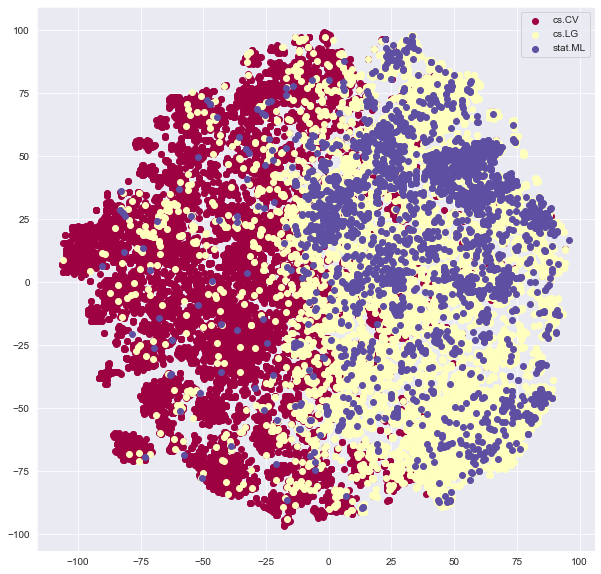

In [87]:
## ؟ points

def plot_docs(emb_vecs_2d: np.ndarray, labels : pd.Series):
    """Draws a 2d plot of input vectors

    Parameters
    ----------
    emb_2d_vecs : List
        A list of 2d vectors

    Returns
    -------
    """

    plt.figure(figsize=(10, 10))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(set(labels)))]
    ls = sorted(set(labels), key=lambda x: (labels == x).sum(), reverse=True)
    for i, label in enumerate(ls):
        x = emb_vecs_2d[labels == label, 0]
        y = emb_vecs_2d[labels == label, 1]
        plt.scatter(x, y, c=[colors[i]], label=label)
    plt.legend()
    plt.show()

plot_docs(docs_embedding_2d, df['category'])

<div dir="rtl">
<font face="XB Zar" size=3>
همانطور که در نمودار بالا مشخص شده‌است،
embedding
به خوبی دسته‌های مختلف را از هم جدا کرده‌است.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی مستندها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد با استفاده از بردارهای جاسازی مستخرج از مدل زبانی با دو روش Kmeans و خوشه‌بندی سلسله‌مراتبی می‌پردازید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش K-means</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را 
<u><b>از پایه</b></u>
 پیاده‌سازی کرده و سپس با استفاده از آن، خوشه‌های اسناد را ایجاد می‌کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های محتلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید. 
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
پیاده‌سازی خود را در تابع cluster_kmeans قرار دهید. این تابع یک لیست از بردارهای جاسازی دریافت کرده و در خروجی، مختصات مرکز هر خوشه را به همراه لیستی از شماره خوشه‌های متناظر با هر بردار جاسازی تولید می‌کند.
توجه کنید که الگوریتم می‌بایست از پایه پیاده‌سازی شود و امکان استفاده از پیاده‌سازی‌های آماده آن وجود ندارد.
</font>
</div>

In [14]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                    punctuation_removal=True):

    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens


preprocessed_documents = df['titles'].str.cat(df['abstracts'], sep=' ').parallel_apply(preprocess_text).str.join(' ')

In [15]:
def find_main_topic(cluster_documents):
    """Find the main topic of a cluster by analyzing its documents using LDA

    Parameters
    ----------
    cluster_documents : list
        List of documents belonging to a cluster

    Returns
    -------
    str
        The main topic of the cluster
    """
    # Create a document-term matrix
    vectorizer = CountVectorizer(ngram_range=(1, 3))
    dtm = vectorizer.fit_transform(cluster_documents)

    # Apply LDA
    n_topics = 1  # Assuming we want to find the main topic
    lda = LatentDirichletAllocation(n_components=n_topics)
    lda.fit(dtm)

    # Get the main topic
    feature_names = vectorizer.get_feature_names_out()
    topic_words = np.array(feature_names)[np.argsort(lda.components_[0])][::-1]
    main_topic = ', '.join(topic_words[:5])  # Assuming we want the top 10 words as the main topic

    return main_topic

K-means clustering with k=3: 43it [00:44,  1.03s/it, loss=6.96e-5] 


k=3


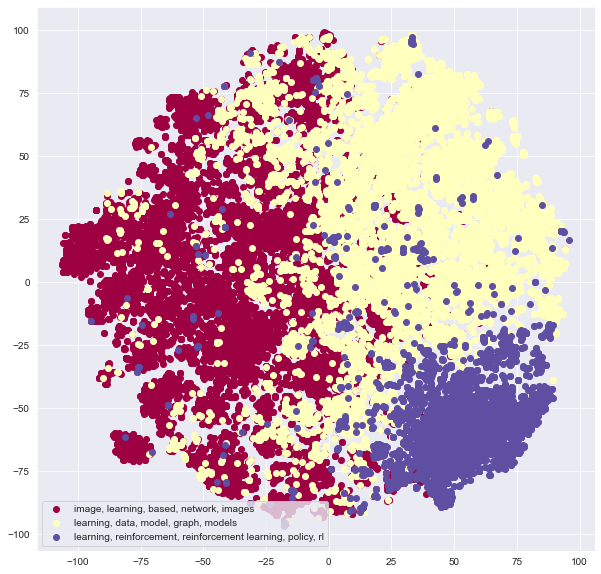

K-means clustering with k=5: 102it [01:54,  1.12s/it, loss=0.000138]


k=5


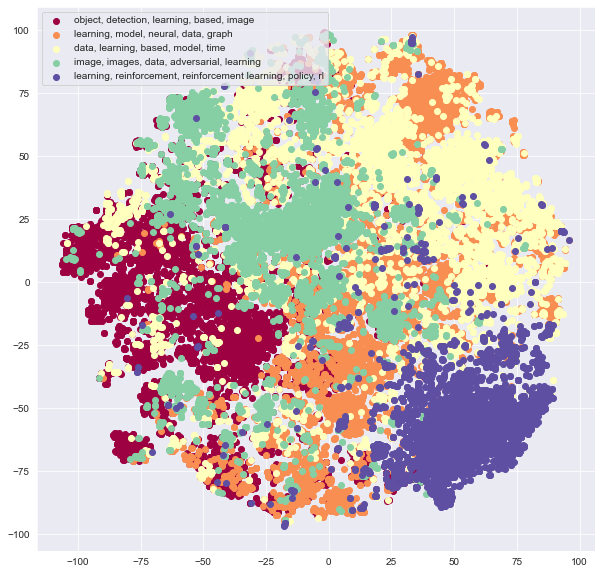

K-means clustering with k=10: 47it [01:59,  2.55s/it, loss=0.000218]


k=10


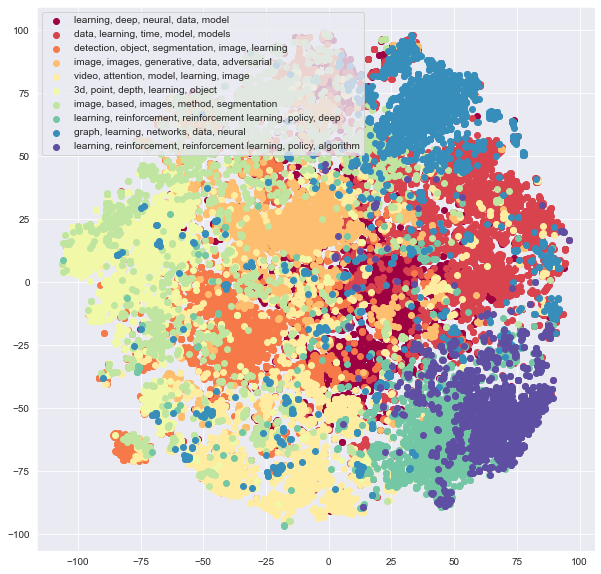

In [90]:
## ؟ points

def cluster_kmeans(emb_vecs : np.ndarray, n_clusters : int):
    """Clusters input vectors using K-means method from scratch

    Parameters
    ----------
    emb_vecs : np.ndarray
        A list of vectors
    n_clusters : int
        Number of clusters

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    # Initialize cluster centers randomly
    cluster_centers = emb_vecs[np.random.choice(np.arange(len(emb_vecs)), n_clusters, replace=False)]

    # Iteratively update cluster centers until convergence
    with tqdm(desc=f'K-means clustering with k={n_clusters}') as pbar:
        while True:
            # Assign each vector to the nearest cluster center
            distances = np.linalg.norm(emb_vecs[:, np.newaxis] - cluster_centers, axis=-1)
            cluster_indices = distances.argmin(axis=-1)

            # Update cluster centers
            new_centers = np.array([emb_vecs[cluster_indices == i].mean(axis=0) for i in range(n_clusters)])

            # Check convergence
            if np.allclose(cluster_centers, new_centers):
                break

            pbar.set_postfix({'loss': np.linalg.norm(cluster_centers - new_centers)})
            pbar.update()
            cluster_centers = new_centers

    return cluster_centers, cluster_indices


k_values = [3, 5, 10]
kmeans_by_k = {}
for k in k_values:
    cluster_centers, cluster_indices = cluster_kmeans(docs_embedding, k)
    cluster_documents = [preprocessed_documents[cluster_indices == i] for i in range(k)]
    main_topics = [find_main_topic(docs) for docs in cluster_documents]
    document_topics = pd.Series([main_topics[i] for i in cluster_indices])
    kmeans_by_k[k] = dict(cluster_centers=cluster_centers, cluster_indices=cluster_indices, main_topics=main_topics)
    print(f'k={k}')
    plot_docs(docs_embedding_2d, document_topics)

k=3


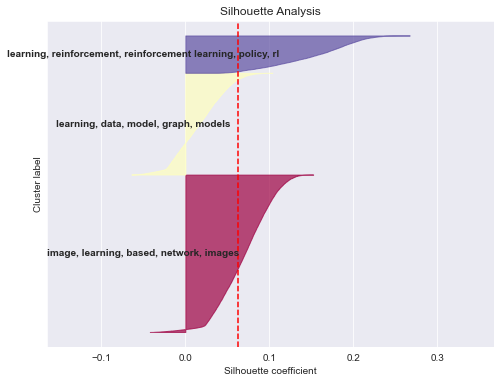

k=5


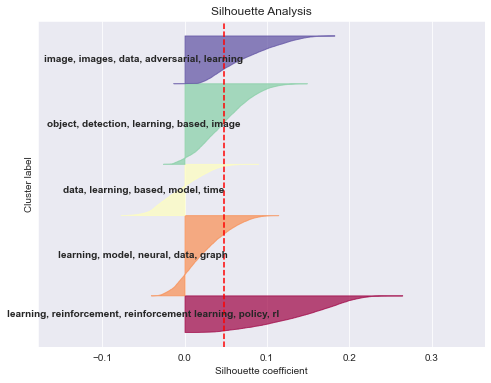

k=10


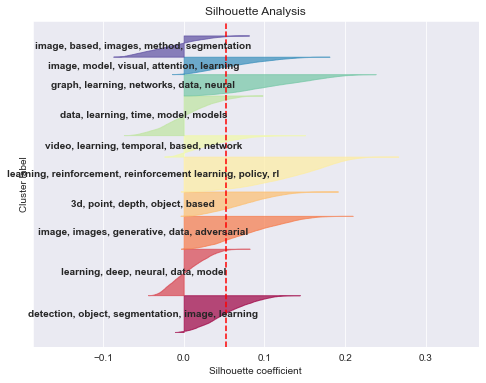

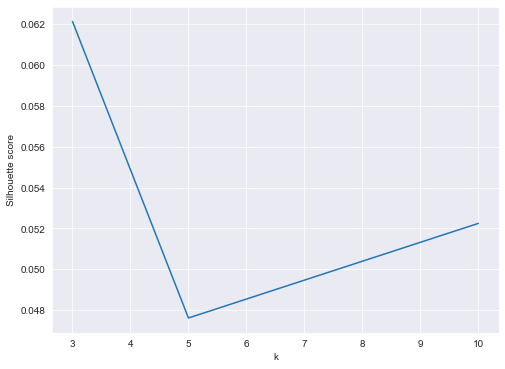

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

def perform_silhouette_analysis(embeddings, clusters_dict):
    """Perform silhouette analysis on the clusters and plot the silhouette scores

    Parameters
    ----------
    embeddings : np.ndarray
        Numpy array containing the embedding points (N x E)
    clusters_dict : dict
        Dictionary of clusters containing cluster centers, cluster indices, and document topics

    Returns
    -------
    float
        Mean silhouette score of all samples
    """
    cluster_centers = clusters_dict['cluster_centers']
    cluster_indices = clusters_dict['cluster_indices']
    main_topics = clusters_dict['main_topics']

    # Compute silhouette scores
    silhouette_scores = silhouette_samples(embeddings, cluster_indices)

    # Compute the mean silhouette score
    mean_silhouette_score = silhouette_score(embeddings, cluster_indices)

    # Plot the silhouette scores
    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    y_lower = 10
    x_min = np.min(silhouette_scores) - 0.1
    x_max = np.max(silhouette_scores) + 0.1
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(cluster_centers))]
    for i in range(len(cluster_centers)):
        cluster_silhouette_scores = silhouette_scores[cluster_indices == i]
        cluster_silhouette_scores.sort()
        cluster_size = cluster_silhouette_scores.shape[0]
        y_upper = y_lower + cluster_size
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_scores, facecolor=colors[i], edgecolor=colors[i], alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * cluster_size, main_topics[i], ha='center', va='center', fontweight='bold')
        y_lower = y_upper + 10

    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=mean_silhouette_score, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xlim([x_min, x_max])

    plt.title("Silhouette Analysis")
    plt.show()

    return mean_silhouette_score

silhouette_scores = {}
for k, kmeans_dict in kmeans_by_k.items():
    print(f'k={k}')
    silhouette_scores[k] = perform_silhouette_analysis(docs_embedding, kmeans_dict)

plt.figure(figsize=(8, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()))
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

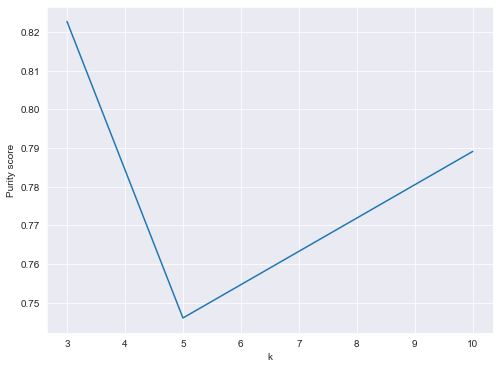

In [32]:
from sklearn.metrics import confusion_matrix

def calculate_purity_score(cluster_indices, labels):
    """Calculate the purity score given the cluster indices and true labels

    Parameters
    ----------
    cluster_indices : list or numpy array
        Cluster indices for each sample
    labels : list or numpy array
        True labels for each sample

    Returns
    -------
    float
        Purity score
    """
    confusion = confusion_matrix(labels, cluster_indices)
    purity = np.sum(np.amax(confusion, axis=0)) / np.sum(confusion)
    return purity


categories = df['category'].unique().tolist()
labels = df['category'].apply(lambda x: categories.index(x)).values
purity_by_k = {
    k: calculate_purity_score(kmeans_dict['cluster_indices'], labels)
    for k, kmeans_dict in kmeans_by_k.items()
}
plt.figure(figsize=(8, 6))
plt.plot(list(purity_by_k.keys()), list(purity_by_k.values()))
plt.xlabel('k')
plt.ylabel('Purity score')
plt.show()

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</font>
</div>

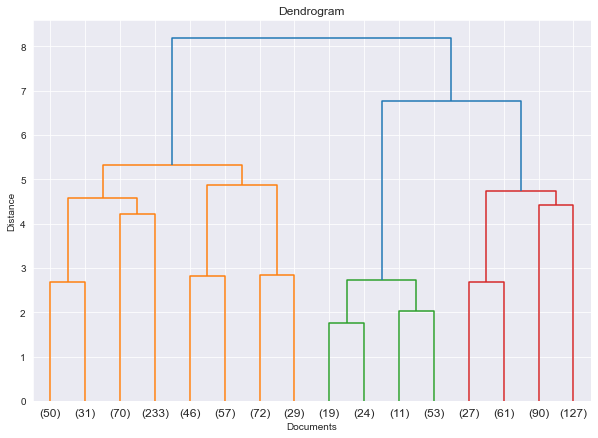

In [61]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

rand_indices = np.random.choice(docs_embedding.shape[0], 1000, replace=False)
# Perform hierarchical clustering
Z = shc.linkage(docs_embedding[rand_indices], method='ward', metric='euclidean')

# Plot the dendrogram with main topics
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
plt.xlabel("Documents")
plt.ylabel("Distance")
d = shc.dendrogram(Z, truncate_mode='level', p=3)
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی خروجی‌های سیستم جستجو فاز ۱</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به افزودن قابلیت خوشه‌بندی در سیستم جستجویی که در فاز ۱ درس توسعه داده‌اید می‌پردازید. برای این منظور، توابعی که تابحال پیاده‌سازی کرده‌اید را به نحوی به سامانه جستجوی فاز ۱ خود اضافه می‌کنید که اسناد خروجی سامانه را خوشه‌بندی کرده و در نمایش خروجی،‌ اسنادی که در یک خوشه هستند را مشخص کند.
می‌توانید با فراخوانی توابعی که در فاز ۱ پیاده‌سازی کرده‌اید و ایجاد تغییر در آن‌ها در سلول زیر، این‌کار را انجام دهید. نحوه پیاده‌سازی این بخش به عهده خودتان است.
</font>
</div>

In [62]:
from collections import Counter
from dataclasses import dataclass
from functools import lru_cache
import math
from termcolor import colored
import os
from typing import Dict, Iterable, Literal, Union, Set, Optional, List, Tuple

from nltk.metrics import distance as nltkd
import numpy as np
import pandas as pd
import spacy

In [63]:
nlp = spacy.load('en_core_web_md')

In [64]:
@dataclass
class Token:
    processed: str
    actual: str
    i: int
    idx: int

    @staticmethod
    def from_spacy_token(token) -> "Token":
        return Token(token.lemma_.lower(), token.text, token.i, token.idx)

    def __repr__(self):
        return self.processed

In [65]:
def batch_clean_data(texts: List[str], batch_size: int = 128) -> List[List[Token]]:
    """Preprocesses the text with tokenization, case folding, stemming and lemmatization, and punctuations

    Parameters
    ----------
    texts : List[str]
        A list of titles or abstracts of articles
    batch_size : int, optional
        The number of texts to be processed at a time, by default 128

    Returns
    -------
    List[List[Doc]]
        A list of lists of tokens
    """
    tokens = nlp.pipe(texts, batch_size=batch_size, n_process=os.cpu_count())
    return [[Token.from_spacy_token(token) for token in doc if not token.is_punct] for doc in tokens]


def clean_data(text: str) -> List[Token]:
    """Preprocesses the text with tokenization, case folding, stemming and lemmatization, and punctuations

    Parameters
    ----------
    text : str
        The title or abstract of an article

    Returns
    -------
    list
        A list of tokens
    """
    return batch_clean_data([text])[0]

In [66]:
def find_stop_words(all_text: List[str], num_token: int = 30) -> Set[str]:
    """Detects stop-words

     Parameters
    ----------
    all_text : list of all tokens
        (result of clean_data(text) for all the text)

    num_token : int
        number of stop words to be detected

    Returns
    -------
    Return Value is optional but must print the stop words and number of their occurence
    """
    counter = Counter(all_text)
    most_occur = counter.most_common(num_token)
    print(pd.DataFrame(most_occur, columns=['token', 'count']))
    return set([token for token, _ in most_occur])

In [67]:
class Corpus:

    def __init__(self, dataset_path: str, stop_topk: int = 30):
        self.data = self.load_data(dataset_path)
        self.stop_topk = stop_topk

    @staticmethod
    def load_data(dataset_path: str) -> pd.DataFrame:
        df = pd.read_csv(dataset_path).fillna('')
        df['category'] = df['terms'].apply(lambda l: eval(l)[0])
        df = df.drop_duplicates(['titles']).drop_duplicates(['abstracts']).reset_index(drop=True)
        df['paper_id'] = df.index.astype(str)
        return df

    @property
    @lru_cache
    def cleaned_documents(self) -> Dict[str, Dict[str, List[Token]]]:
        return {
            paper_id: {
                'title': cleaned_titles,
                'abstract': cleaned_abstracts,
                'category': category,
            }
            for paper_id, cleaned_titles, cleaned_abstracts, category in zip(
                self.data['paper_id'].tolist(),
                batch_clean_data(self.data['titles'].tolist()),
                batch_clean_data(self.data['abstracts'].tolist()),
                self.data['category'].tolist(),
            )
        }

    @property
    @lru_cache
    def stop_tokens(self) -> Set[str]:
        return find_stop_words(
            [token.processed
             for tokens in self.cleaned_documents.values()
             for token in tokens['title'] + tokens['abstract']],
            num_token=self.stop_topk,
        )

    @property
    @lru_cache
    def non_stop_documents(self) -> Dict[str, Dict[str, List[Token]]]:
        return {
            paper_id: {
                'title': [token for token in tokens['title'] if token.processed not in self.stop_tokens],
                'abstract': [token for token in tokens['abstract'] if token.processed not in self.stop_tokens],
                'category': tokens['category'],
            }
            for paper_id, tokens in self.cleaned_documents.items()
        }

    @property
    @lru_cache
    def document_ids_by_category(self) -> Dict[str, Set[str]]:
        return {
            category: set(self.data[self.data['category'] == category]['paper_id'].tolist())
            for category in self.data['category'].unique()
        }

    def __len__(self) -> int:
        return len(self.data)

In [68]:
class TrieNode:

    def __init__(self):
        self.children: Dict[str, TrieNode] = {}
        self.idx_in_doc: Dict[str, Dict[Literal['title', 'abstract'], Set[int]]] = {}
        self.is_end = False

    def insert(self, doc_id: str, doc_section: Literal['title', 'abstract'], token: Token):
        node = self
        for char in token.processed:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
            if doc_id not in node.idx_in_doc:
                node.idx_in_doc[doc_id] = {'title': set(), 'abstract': set()}
            node.idx_in_doc[doc_id][doc_section].add(token.idx)
        node.is_end = True

    def search(self, token: str) -> Optional[
        Dict[str, Dict[Literal['title', 'abstract'], Set[int]]]]:
        node = self
        for char in token:
            if char not in node.children:
                return None
            node = node.children[char]
        if node.is_end:
            return node.idx_in_doc
        return None

    def remove_document(self, doc_id: str):
        if doc_id in self.idx_in_doc:
            del self.idx_in_doc[doc_id]
        for child in self.children.values():
            child.remove_document(doc_id)

    def traverse_words(self, prefix: str = '') -> Iterable[Tuple[str,
    Dict[str, Dict[Literal['title', 'abstract'], Set[int]]]]]:
        if self.is_end:
            yield prefix, {
                doc_id: {
                    k: list(v) for k, v in doc.items()
                }
                for doc_id, doc in self.idx_in_doc.items()
            }

        for char, child in self.children.items():
            yield from child.traverse_words(prefix + char)

    @classmethod
    def from_words(cls, words: Iterable[Tuple[str,
    Dict[str, Dict[Literal['title', 'abstract'], Iterable[int]]]]]) -> 'TrieNode':
        root = cls()
        for word, idx_in_doc in words:
            for doc_id, doc in idx_in_doc.items():
                for doc_section, indices in doc.items():
                    for idx in indices:
                        token = Token(word, '', -1, idx)
                        root.insert(doc_id, doc_section, token)
        return root

    def to_dict(self):
        return {
            'children': {char: child.to_dict() for char, child in self.children.items()},
            'idx_in_doc': self.idx_in_doc,
            'is_end': self.is_end,
        }

    @classmethod
    def from_dict(cls, data: Dict):
        node = cls()
        node.children = {char: cls.from_dict(child) for char, child in data['children'].items()}
        node.i_in_doc = data['i_in_doc']
        node.is_end = data['is_end']
        return node

In [69]:
WORD_BOUNDARY_CHAR = '¶'


def get_word_bigrams(word: str) -> Iterable[str]:
    """
    Returns the bigrams of the given word

    Parameters
    ----------
    word: str
        The word to get the bigrams from

    Returns
    -------
    list
        A list of bigrams
    """
    word = WORD_BOUNDARY_CHAR + word + WORD_BOUNDARY_CHAR
    return [word[i:i + 2] for i in range(len(word) - 1)]


def create_bigram_index(corpus: Corpus) -> Dict[str, Dict[str, int]]:
    """
    Creates a bigram index for the spell correction

    Parameters
    ----------
    corpus: Corpus
        The corpus to generate the bigram index from

    Returns
    -------
    dict
        A dictionary of bigrams and their occurence
    """
    bigram_index: Dict[str, Dict[str, int]] = {}
    seen_words = set()
    for doc_id, doc in corpus.cleaned_documents.items():
        for section_name, doc_section in doc.items():
            if section_name == 'category':
                continue
            for token in doc_section:
                if token.actual in seen_words:
                    continue
                seen_words.add(token.actual)
                for bigram in get_word_bigrams(token.actual):
                    if bigram not in bigram_index:
                        bigram_index[bigram] = {}
                    if token.actual not in bigram_index[bigram]:
                        bigram_index[bigram][token.actual] = 0
                    bigram_index[bigram][token.actual] += 1
    return bigram_index

In [70]:
def correct_text(bigram_index: Dict[str, Dict[str, int]], text: str, similar_words_limit: int = 20) -> str:
    """
    Correct the give query text, if it is misspelled

    Parameters
    ---------
    bigram_index: Dict[str, Dict[str, int]]
        The bigram index to search in
    text: str
        The query text
    similar_words_limit: int
        The number of similar words

    Returns
    ---------
    str
        The corrected form of the given text
    """
    corrected_text = ''.join(text)
    for token in nlp(text):
        word = token.text
        if token.is_punct:
            continue
        word_occurences: Dict[str, int] = {}
        for bigram in get_word_bigrams(word):
            for posting, occurence in bigram_index.get(bigram, {}).items():
                if posting not in word_occurences:
                    word_occurences[posting] = 0
                word_occurences[posting] += occurence
        jaccard_scores = {
            posting: word_occurence / (len(word) + len(posting) + 2 - word_occurence)
            for posting, word_occurence in word_occurences.items()
        }
        similar_words = sorted(jaccard_scores, key=jaccard_scores.get, reverse=True)[:similar_words_limit]
        min_edit_distance = float('inf')
        corrected_word = word
        for similar_word in similar_words:
            if (edit_distance := nltkd.edit_distance(similar_word, word)) < min_edit_distance:
                min_edit_distance = edit_distance
                corrected_word = similar_word
        corrected_text = corrected_text.replace(word, corrected_word)
    return corrected_text

In [71]:
def construct_positional_indexes(corpus: Corpus):
    """
    Get processed data and insert words in that into a trie and construct postional_index and posting lists after wards.

    Parameters
    ----------
    corpus: Corpus
        processed data

    Return
    ----------
    docs:
        list of docs with specificied id, title, abstract.
    """
    trie = TrieNode()
    for doc_id, doc in corpus.non_stop_documents.items():
        for doc_section, tokens in doc.items():
            if doc_section == 'category':
                continue
            for token in tokens:
                trie.insert(doc_id, doc_section, token)
    return trie

In [72]:
def write_json(o, path: str):
    import json
    with open(path, 'w') as f:
        json.dump(o, f)


def get_offset(gap): return bin(gap)[3:]


def get_length(offset): return unary_codification(len(offset)) + '0'


def unary_codification(gap): return '1' * gap


def get_gaps_list(posting_lists): return [posting_lists[0]] + [posting_lists[i] - posting_lists[i - 1] for i in
                                                               range(1, len(posting_lists))]


def gamma_encoding(postings):
    if not postings:
        return ''
    postings = [p + 1 for p in postings]
    return ''.join([get_length(get_offset(gap)) + get_offset(gap) for gap in get_gaps_list(postings)])


def write_gamma_code(words: Iterable[Tuple[str, Dict[str, Dict[Literal['title', 'abstract'], Iterable[int]]]]], path: str):
    with open(path, 'wb') as f:
        for word, posting_lists in words:
            encoded_word = word.encode('utf-8')
            f.write(len(encoded_word).to_bytes(1, 'big'))
            f.write(encoded_word)
            f.write(len(posting_lists).to_bytes(4, 'big'))
            for doc_id, doc in posting_lists.items():
                encoded_doc_id = doc_id.encode('utf-8')
                f.write(len(encoded_doc_id).to_bytes(1, 'big'))
                f.write(encoded_doc_id)
                title_postings = sorted(doc['title'])
                encoded_title_postings = gamma_encoding(title_postings)
                encoding_length = len(encoded_title_postings)
                octet_encoded_title_postings = '0b' + \
                                               '0' * (8 - len(encoded_title_postings) % 8) + \
                                               encoded_title_postings
                n_bytes = len(octet_encoded_title_postings) // 8
                f.write(n_bytes.to_bytes(1, 'big'))
                f.write(encoding_length.to_bytes(2, 'big'))
                f.write(int(octet_encoded_title_postings, 2).to_bytes(n_bytes, 'big'))

                encoded_abstract_postings = gamma_encoding(sorted(doc['abstract']))
                encoding_length = len(encoded_abstract_postings)
                octet_encoded_abstract_postings = '0b' + \
                                                  '0' * (8 - len(encoded_abstract_postings) % 8) + \
                                                  encoded_abstract_postings
                n_bytes = len(octet_encoded_abstract_postings) // 8
                f.write(n_bytes.to_bytes(1, 'big'))
                f.write(encoding_length.to_bytes(2, 'big'))
                f.write(int(octet_encoded_abstract_postings, 2).to_bytes(n_bytes, 'big'))


def vb_encoding_number(n):
    b = []
    while True:
        b = [n % 128] + b
        n = n // 128
        if n == 0:
            break
    b[-1] += 128
    return bytes(b)


def vb_encoding(numbers):
    return b''.join([vb_encoding_number(n) for n in numbers])


def write_vb_code(words: Iterable[Tuple[str, Dict[str, Dict[Literal['title', 'abstract'], Iterable[int]]]]], path: str):
    with open(path, 'wb') as f:
        for word, posting_lists in words:
            encoded_word = word.encode('utf-8')
            f.write(len(encoded_word).to_bytes(1, 'big'))
            f.write(encoded_word)
            f.write(len(posting_lists).to_bytes(4, 'big'))
            for doc_id, doc in posting_lists.items():
                encoded_doc_id = doc_id.encode('utf-8')
                f.write(len(encoded_doc_id).to_bytes(1, 'big'))
                f.write(encoded_doc_id)
                title_postings = doc['title']
                encoded_title_postings = vb_encoding(title_postings)
                encoding_length = len(encoded_title_postings)
                f.write(encoding_length.to_bytes(4, 'big'))
                f.write(encoded_title_postings)

                abstract_postings = doc['abstract']
                encoded_abstract_postings = vb_encoding(abstract_postings)
                encoding_length = len(encoded_abstract_postings)
                f.write(encoding_length.to_bytes(4, 'big'))
                f.write(encoded_abstract_postings)


def store_index(trie: TrieNode, path: str, compression_type: str) -> int:
    """Stores the index in a file

    Parameters
    ----------
    trie: TrieNode
        trie of corpus
    path : str
        Path to store the file
    compression_type : str
        Could be one of the followings:
        - no-compression
        - gamma-code
        - variable-byte

    Return
    ----------
    int
        The size of the stored file
    """
    os.makedirs(os.path.dirname(path), exist_ok=True)
    word_list = trie.traverse_words()
    if compression_type == "no-compression":
        write_json(list(word_list), path)
    elif compression_type == 'gamma-code':
        write_gamma_code(word_list, path)
    elif compression_type == 'variable-byte':
        write_vb_code(word_list, path)
    else:
        raise ValueError("compression_type should be one of the followings: no-compression, gamma-code, variable-byte")
    return os.stat(path).st_size


In [73]:
def unary_decodification(gap): return sum(map(int, gap))


def gamma_decoding(gamma):
    num, length, offset, aux, res = 0, "", "", 0, []
    while gamma != "":
        aux = gamma.find("0")
        length = gamma[:aux]
        if length == "":
            res.append(1); gamma = gamma[1:]
        else:
            offset = "1" + gamma[aux + 1:aux + 1 + unary_decodification(length)]
            res.append(int(offset, 2))
            gamma = gamma[aux + 1 + unary_decodification(length):]
    return [int(p) - 1 for p in np.cumsum(res)]


def read_gamma_code(path: str) -> Iterable[Tuple[str, Dict[str, Dict[Literal['title', 'abstract'], Iterable[int]]]]]:
    with open(path, 'rb') as f:
        while True:
            word_length = f.read(1)
            if not word_length:
                break
            word_length = int.from_bytes(word_length, 'big')
            word = f.read(word_length).decode('utf-8')
            n_posting_lists = int.from_bytes(f.read(4), 'big')
            posting_lists = {}
            for _ in range(n_posting_lists):
                doc_id_length = int.from_bytes(f.read(1), 'big')
                doc_id = f.read(doc_id_length).decode('utf-8')
                title_postings_n_bytes = int.from_bytes(f.read(1), 'big')
                title_posting_length = int.from_bytes(f.read(2), 'big')
                title_postings_int = int.from_bytes(f.read(title_postings_n_bytes), 'big')
                title_postings_bin = bin(title_postings_int)
                if title_posting_length == 0:
                    title_postings = []
                else:
                    aligned_title_postings_bin = '0' * (title_posting_length - len(title_postings_bin[2:])) + title_postings_bin[2:]
                    title_postings = gamma_decoding(aligned_title_postings_bin)

                abstract_postings_n_bytes = int.from_bytes(f.read(1), 'big')
                abstract_posting_length = int.from_bytes(f.read(2), 'big')
                abstract_postings_int = int.from_bytes(f.read(abstract_postings_n_bytes), 'big')
                abstract_postings_bin = bin(abstract_postings_int)
                if abstract_posting_length == 0:
                    abstract_postings = []
                else:
                    aligned_abstract_postings_bin = '0' * (abstract_posting_length - len(abstract_postings_bin[2:])) + abstract_postings_bin[2:]
                    abstract_postings = gamma_decoding(aligned_abstract_postings_bin)

                posting_lists[doc_id] = {
                    'title': title_postings,
                    'abstract': abstract_postings,
                }
            yield word, posting_lists


def vb_decoding(encoded: bytes):
    numbers = []
    n = 0
    for b in encoded:
        n = n * 128 + (b % 128)
        if b >= 128:
            numbers.append(n)
            n = 0
    return numbers


def read_vb_code(path: str) -> Iterable[Tuple[str, Dict[str, Dict[Literal['title', 'abstract'], Iterable[int]]]]]:
    with open(path, 'rb') as f:
        while True:
            word_length = f.read(1)
            if not word_length:
                break
            word_length = int.from_bytes(word_length, 'big')
            word = f.read(word_length).decode('utf-8')
            n_posting_lists = int.from_bytes(f.read(4), 'big')
            posting_lists = {}
            for _ in range(n_posting_lists):
                doc_id_length = int.from_bytes(f.read(1), 'big')
                doc_id = f.read(doc_id_length).decode('utf-8')
                title_postings_n_bytes = int.from_bytes(f.read(4), 'big')
                title_postings = vb_decoding(f.read(title_postings_n_bytes))

                abstract_postings_n_bytes = int.from_bytes(f.read(4), 'big')
                abstract_postings = vb_decoding(f.read(abstract_postings_n_bytes))

                posting_lists[doc_id] = {
                    'title': title_postings,
                    'abstract': abstract_postings,
                }
            yield word, posting_lists


def load_index(path: str, compression_type: str) -> TrieNode:
    """Loads the index from a file

    Parameters
    ----------
    path : str
        Path of the file to load from

    compression_type : str
        Could be one of the followings:
        - no-compression
        - gamma-code
        - variable-byte
    """
    if compression_type == 'no-compression':
        import json
        with open(path, 'r') as f:
            word_list = json.load(f)
        return TrieNode.from_words(word_list)
    if compression_type == 'gamma-code':
        return TrieNode.from_words(read_gamma_code(path))
    if compression_type == 'variable-byte':
        return TrieNode.from_words(read_vb_code(path))
    else:
        raise ValueError("compression_type should be one of the followings: no-compression, gamma-code, variable-byte")

In [93]:
def logarithmic_w_tf(tf: Dict[str, float]) -> Dict[str, float]:
    return {
        token: 1 + math.log(token_tf) if token_tf > 0 else 0
        for token, token_tf in tf.items()
    }


def cosine_normalization(w: Iterable[float]) -> float:
    return math.sqrt(sum(w_i ** 2 for w_i in w))


def get_df(token_search_results: Dict[str, Dict[str, Dict[Literal['title', 'abstract'], List[int]]]]) -> Dict[str, int]:
    return {
        token: len(search_results)
        for token, search_results in token_search_results.items()
    }


def query_tf_idf(query_tokens: List[str],
                 token_search_results: Dict[str, Dict[str, Dict[Literal['title', 'abstract'], List[int]]]],
                 score_type: str) -> Dict[str, float]:
    tf = {
        token: query_tokens.count(token)
        for token in token_search_results
    }
    if score_type[0] == 'n':
        w_tf = tf
    elif score_type[0] == 'l':
        w_tf = logarithmic_w_tf(tf)
    else:
        raise ValueError(f'tf method {score_type[0]} not supported')

    if score_type[1] == 'n':
        w_idf = {token: 1 for token in token_search_results}
    else:
        raise ValueError(f'idf method {score_type[1]} not supported')

    if score_type[2] == 'n':
        normalization = 1
    elif score_type[2] == 'c':
        normalization = cosine_normalization(w_tf.values())
    else:
        raise ValueError(f'normalization method {score_type[1]} not supported')

    w = {
        token: w_tf[token] * w_idf[token] / normalization
        for token in token_search_results
    }
    return w


def doc_tf_idf(corpus: Corpus,
               doc_section: str,
               token_search_results: Dict[str, Dict[str, Dict[Literal['title', 'abstract'], List[int]]]],
               query_w: Dict[str, float],
               score_type: str):
    if score_type[1] == 't':
        df = get_df(token_search_results)
        w_idf = {
            token: math.log(len(corpus) / token_df)
            for token, token_df in df.items()
        }
    else:
        raise ValueError(f'idf method {score_type[1]} not supported')

    all_documents = set()
    for search_results in token_search_results.values():
        all_documents.update(search_results.keys())

    doc_scores = {}
    for doc_id in all_documents:
        doc_tf = {
            token: len(search_results[doc_id][doc_section])
            for token, search_results in token_search_results.items()
            if doc_id in search_results
        }
        if score_type[0] == 'l':
            doc_w_tf = logarithmic_w_tf(doc_tf)
        else:
            raise ValueError(f'tf method {score_type[0]} not supported')

        if score_type[2] == 'n':
            doc_normalization = 1
        elif score_type[2] == 'c':
            doc_normalization = cosine_normalization(doc_w_tf.values())
        else:
            raise ValueError(f'normalization method {score_type[1]} not supported')

        doc_w = {
            token: doc_w_tf[token] * w_idf[token] / doc_normalization
            for token in doc_w_tf
            if doc_normalization > 0
        }
        doc_scores[doc_id] = sum(
            query_w[token] * doc_w[token]
            for token in query_w
            if token in doc_w
        )
    return doc_scores


def tf_idf(corpus: Corpus, doc_section: Literal['title', 'abstract'],
           token_search_results: Dict[str, Dict[str, Dict[Literal['title', 'abstract'], List[int]]]],
           query_tokens: List[str], score_type: str) -> Dict[str, float]:
    doc_score_type, query_score_type = score_type.split('-')
    query_w = query_tf_idf(query_tokens, token_search_results, query_score_type)
    return doc_tf_idf(corpus, doc_section, token_search_results, query_w, doc_score_type)


def okapi25(corpus: Corpus, doc_section: Literal['title', 'abstract'],
            token_search_results: Dict[str, Dict[str, Dict[Literal['title', 'abstract'], List[int]]]],
            query_tokens: List[str], k1: float = 1.2, b: float = 0.75) -> Dict[str, float]:
    all_documents = set()
    for search_results in token_search_results.values():
        all_documents.update(search_results.keys())

    df = get_df(token_search_results)
    idf = {
        token: math.log((len(all_documents) - token_df + 0.5) / (token_df + 0.5) + 1)
        for token, token_df in df.items()
    }
    f = {
        token: {
            doc_id: len(doc[doc_section])
            for doc_id, doc in search_results.items()
        }
        for token, search_results in token_search_results.items()
    }
    dl = {
        doc_id: len(corpus.non_stop_documents[doc_id][doc_section])
        for doc_id in all_documents
    }
    avgdl = sum(
        len(corpus.non_stop_documents[doc_id][doc_section])
        for doc_id in all_documents
    ) / len(all_documents)

    doc_scores = {}
    for doc_id in all_documents:
        doc_scores[doc_id] = sum(
            idf[token] * (
                    f[token].get(doc_id, 0.0) * (k1 + 1)
            ) / (
                    f[token].get(doc_id, 0.0) + k1 * (1 - b + b * dl[doc_id] / avgdl)
            )
            for token in query_tokens
        )
    return doc_scores


@dataclass
class SearchResult:
    doc_id: str
    score: float
    title: str
    abstract: str
    category: str
    cluster: str


def highlight_text(text: str, highlight_starts: List[int]) -> str:
    result = ''
    last_index = 0
    highlight_starts = sorted(highlight_starts)
    for i, highlight_start in enumerate(highlight_starts):
        next_start = highlight_starts[i + 1] if i + 1 < len(highlight_starts) else len(text)
        if highlight_start == next_start:
            print(highlight_start, next_start, text, colored(text[highlight_start:], 'yellow'), highlight_starts)
        token = nlp(text[highlight_start:next_start])[0]
        highlight_length = len(token)
        result += text[last_index:highlight_start] + \
                  colored(text[highlight_start:highlight_start + highlight_length], 'red')
        last_index = highlight_start + highlight_length
    result += text[last_index:]
    return result


def search(corpus: Corpus, trie: TrieNode, bigram_index: Dict[str, Dict[str, int]], query: str, max_result_count: int,
           method: str = 'ltn-lnn', weight: float = 0.5, highlight: bool = False, print_result: bool = False, category: str = 'all',
           kmeans_dict: dict = None) -> List[SearchResult]:
    """
        Finds relevant documents to query

        Parameters
        ---------------------------------------------------------------------------------------------------
        corpus: Corpus
            The corpus
        trie: TrieNode
            The trie
        bigram_index: Dict[str, Dict[str, int]]
            The bigram index
        query: str
            The query string
        max_result_count: int
            Return top 'max_result_count' docs which have the highest scores.
            notice that if max_result_count = -1, then you have to return all docs
        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'
        weight: float
            weight of abstract score
        highlight: bool
            If True, highlight the query tokens in search results
        print_result: bool
            If True, print the results in a readable format
        category: str
            If 'all', search in all documents, else search in documents of the given category
        kmeans_dict: dict
            If not None, use kmeans_dict to cluster documents

        Returns
        ----------------------------------------------------------------------------------------------------
        list
            Retrieved documents with snippet
    """
    corrected_query = correct_text(bigram_index, query)
    if print_result:
        print(f'Query'.center(100, '-'))
        print(corrected_query.center(100, '-'))
        print('-' * 100)
    query_tokens = [token.processed
                    for token in clean_data(corrected_query)
                    if token.processed not in corpus.stop_tokens]
    token_search_results: Dict[str, Dict[str, Dict[Literal['title', 'abstract'], List[int]]]] = {
        token: trie.search(token) or {}
        for token in query_tokens
    }
    token_search_results = {
        token: search_results if category == 'all' else {
            doc_id: doc
            for doc_id, doc in search_results.items()
            if doc_id in corpus.document_ids_by_category[category]
        }
        for token, search_results in token_search_results.items()
    }
    if '-' in method:
        title_doc_scores = tf_idf(corpus, 'title', token_search_results, query_tokens, method)
        abstract_doc_scores = tf_idf(corpus, 'abstract', token_search_results, query_tokens, method)
    elif method == 'okapi25':
        title_doc_scores = okapi25(corpus, 'title', token_search_results, query_tokens)
        abstract_doc_scores = okapi25(corpus, 'abstract', token_search_results, query_tokens)
    else:
        raise ValueError(f'Expected the method to be one of \'ltn-lnn\', \'ltc-lnc\', or \'okapi25\', bot got {method}')
    doc_scores = {
        doc_id: weight * abstract_doc_scores.get(doc_id, 0.0) + (1 - weight) * title_doc_scores.get(doc_id, 0.0)
        for doc_id in set(title_doc_scores.keys()) | set(abstract_doc_scores.keys())
    }
    if highlight:
        doc_highlights = {
            doc_id: {
                'title': sum([
                    list(token_search_results[token][doc_id]['title'])
                    for token in query_tokens
                    if token in token_search_results and doc_id in token_search_results[token]
                ], []),
                'abstract': sum([
                    list(token_search_results[token][doc_id]['abstract'])
                    for token in query_tokens
                    if token in token_search_results and doc_id in token_search_results[token]
                ], [])
            }
            for doc_id in doc_scores
        }
    else:
        doc_highlights = {
            doc_id: {
                'title': [],
                'abstract': [],
            }
            for doc_id in doc_scores
        }
    if kmeans_dict is not None:
        cluster_topics = {
            doc_id: kmeans_dict['main_topics'][kmeans_dict['cluster_indices'][int(doc_id)]]
            for doc_id in doc_scores
        }
    else:
        cluster_topics = None
    documents = [
        SearchResult(
            doc_id=doc_id,
            score=score,
            title=highlight_text(corpus.data[corpus.data['paper_id'] == doc_id]['titles'].item(),
                                 doc_highlights[doc_id]['title']),
            abstract=highlight_text(corpus.data[corpus.data['paper_id'] == doc_id]['abstracts'].item(),
                                    doc_highlights[doc_id]['abstract']),
            category=corpus.data[corpus.data['paper_id'] == doc_id]['category'].item(),
            cluster=cluster_topics[doc_id] if cluster_topics is not None else None
        )
        for i, (doc_id, score) in enumerate(sorted(doc_scores.items(), key=lambda x: x[1], reverse=True))
        if i < max_result_count or max_result_count == -1
    ]
    if print_result:
        for i, doc in enumerate(documents):
            print(f'# {i} - Document ID: {colored(doc.doc_id, "green")} - Category: {doc.category} - Score: {colored(doc.score, "green")}')
            if doc.cluster:
                print(f' Cluster: {doc.cluster} '.center(100, '-'))
            print(doc.title.center(100, '-'))
            print(f'Abstract'.center(100, '-'))
            print(doc.abstract)
            print('-' * 100)
    return documents

In [75]:
arxiv = Corpus('data/arxiv/arxiv_data_210930-054931.csv', stop_topk=20)

In [77]:
# cache preprocess result for ai-bio
_ = arxiv.non_stop_documents

       token   count
0         \n  619391
1        the  399440
2         of  237312
3        and  203696
4         to  193328
5          a  181314
6         be  167739
7         in  146603
8         we  114417
9        for   99724
10        on   78439
11      that   73347
12      with   64220
13     model   62027
14      this   59163
15     image   52906
16  learning   50387
17    method   49841
18       use   47241
19        as   45452


In [ ]:
arxiv_trie = construct_positional_indexes(arxiv)

In [ ]:
print('variable-byte:', store_index(arxiv_trie, "index/arxiv/variable-byte", "variable-byte"))

variable-byte: 190400762


In [78]:
arxiv_trie = load_index("index/arxiv/variable-byte", "variable-byte")

In [79]:
arxiv_bigram_index = create_bigram_index(arxiv)

In [99]:
_ = search(arxiv, arxiv_trie, arxiv_bigram_index, 'autonomous vehicles', 20,
           method='okapi25', weight=0.2, highlight=True, print_result=True, kmeans_dict=kmeans_by_k[10])

-----------------------------------------------Query------------------------------------------------
----------------------------------------autonomous vehicles-----------------------------------------
----------------------------------------------------------------------------------------------------
# 0 - Document ID: 20431 - Category: cs.LG - Score: 1.274126837671719
-------------- Cluster: learning, reinforcement, reinforcement learning, policy, deep --------------
---------Transfer Learning and Organic Computing for Autonomous Vehicles----------
----------------------------------------------Abstract----------------------------------------------
Autonomous Vehicles(AV) are one of the brightest promises of the future which
would help cut down fatalities and improve travel time while working in
harmony. Autonomous vehicles will face with challenging situations and
experiences not seen before. These experiences should be converted to knowledge
and help the vehicle prepare better in th

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جست‌و‌جوی اسناد مشابه با یک سند</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما به پیاده‌سازی تابع find_similar_docs می‌پردازید که در آن با دریافت اندیس یک سند در مجموعه دادگان، تعداد اسناد مشابه مورد نظر و لیست بردارهای جاسازی، اندیس اسناد مشابه با آن در مجموعه دادگان را در خروجی تولید می‌کند. برای این منظور، به تعداد num_of_similar_docs تا از نزدیک‌ترین بردارها را به بردار مدنظر پیدا کرده و اندیس آن‌ها را به عنوان خروجی برمیگردانید. اسناد مشابه باید به ترتیب شباهت (مقدار شباهت بردار جاسازی آن‌ها به بردار جاسازی سند ورودی) مرتب شده باشند. انتخاب معیار شباهت برعهده خودتان است.
</font>
</div>

In [83]:
## ؟ points

from typing import List

def find_similar_docs(input_doc_index : int,
                      num_of_similar_docs: int,
                      emb_vecs : np.ndarray):
    """Finds similar documents to input in dataset using L2 distance

    Parameters
    ----------
    input_doc_index: int
        Index of input document vector in emb_vecs list to search for specific paper

    num_of_similar_docs:
        Number of similar documents to return 

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to input document
    """
    input_embedding = emb_vecs[input_doc_index]
    distances = np.linalg.norm(emb_vecs - input_embedding, axis=1)
    return np.argsort(distances)[1:num_of_similar_docs+1]


def print_document(index: int):
    """Prints document with given index

    Parameters
    ----------
    index: int
        Index of document to print
    """
    print(f' {index} - {df.iloc[index]["titles"]} '.center(100, '-'))
    print(f' Abstract '.center(100, '-'))
    print(df.iloc[index]['abstracts'])


def show_similar_docs(main_index: int, similar_indices: List[int]):
    print(f' Main document '.center(100, '-'))
    print_document(main_index)
    print(f' Similar documents '.center(100, '-'))
    for i, index in enumerate(similar_indices):
        print(f' {i+1} '.center(100, '-'))
        print_document(index)
        print('-' * 100)


main_index = np.random.randint(0, len(docs_embedding))
similar_indices = find_similar_docs(main_index, 5, docs_embedding)
show_similar_docs(main_index, similar_indices)

------------------------------------------ Main document -------------------------------------------
--------------- 31004 - GradNet: Gradient-Guided Network for Visual Object Tracking ----------------
--------------------------------------------- Abstract ---------------------------------------------
The fully-convolutional siamese network based on template matching has shown
great potentials in visual tracking. During testing, the template is fixed with
the initial target feature and the performance totally relies on the general
matching ability of the siamese network. However, this manner cannot capture
the temporal variations of targets or background clutter. In this work, we
propose a novel gradient-guided network to exploit the discriminative
information in gradients and update the template in the siamese network through
feed-forward and backward operations. Our algorithm performs feed-forward and
backward operations to exploit the discriminative informaiton in gradients and
capt